## Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

main_data = pd.read_csv('Video_Games.csv')

## Data Exploration

In [3]:
print("Data Overview:")
# Drop rows where all column values are null
main_data.dropna(how='all', inplace=True)
# Drop rows with exact duplicate values in all columns
main_data.drop_duplicates(inplace=True)
# Summary info about columns, data types, and null values
main_data.info()   

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dt

### First 50 rows of Data

In [4]:
main_data.head(50)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


### Converting Invalid Data Types

In [5]:
#Convert User_Score into numeric, errors = 'coerce' converts non numeric values into NaN/null
main_data['User_Score'] = pd.to_numeric(main_data['User_Score'], errors='coerce',downcast='integer')
main_data['User_Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16928 entries, 0 to 16927
Series name: User_Score
Non-Null Count  Dtype  
--------------  -----  
7718 non-null   float64
dtypes: float64(1)
memory usage: 132.4 KB


### Checking Missing Values

In [6]:
print("Missing Values:")
print(main_data.isnull().sum())
#Fill with mean so we dont rght skew the distribution to 0
#### Add code here later

Missing Values:
index                 0
Name                  2
Platform              0
Year_of_Release     273
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         9210
User_Count         9210
Developer          6688
Rating             6836
dtype: int64


In [7]:
#Take a look at the list of data types that we have in our data by making a list and iterating each
dataTypeList = set(main_data.dtypes)
print('List of data types in data:',dataTypeList)

# Count columns for each data type
for dtype in dataTypeList:
    columns_count = len(main_data.select_dtypes(include=dtype).columns)
    print(f"Number of {dtype} in main_data: {columns_count}")

List of data types in data: {dtype('float64'), dtype('O'), dtype('int64')}
Number of float64 in main_data: 10
Number of object in main_data: 6
Number of int64 in main_data: 1


###  Descriptive Statistics

In [8]:
print("Descriptive Statistics:")
main_data.describe()

Descriptive Statistics:


,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16928.000000,16655.00000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,7718.000000,7718.000000
mean,8463.500000,2006.48532,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,7.125926,163.269629
std,4886.837014,5.88289,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,1.498886,562.786746
min,0.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,4231.750000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,8463.500000,2007.00000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,25.000000
75%,12695.250000,2010.00000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,8.200000,82.000000
max,16927.000000,2020.00000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


### Distribution

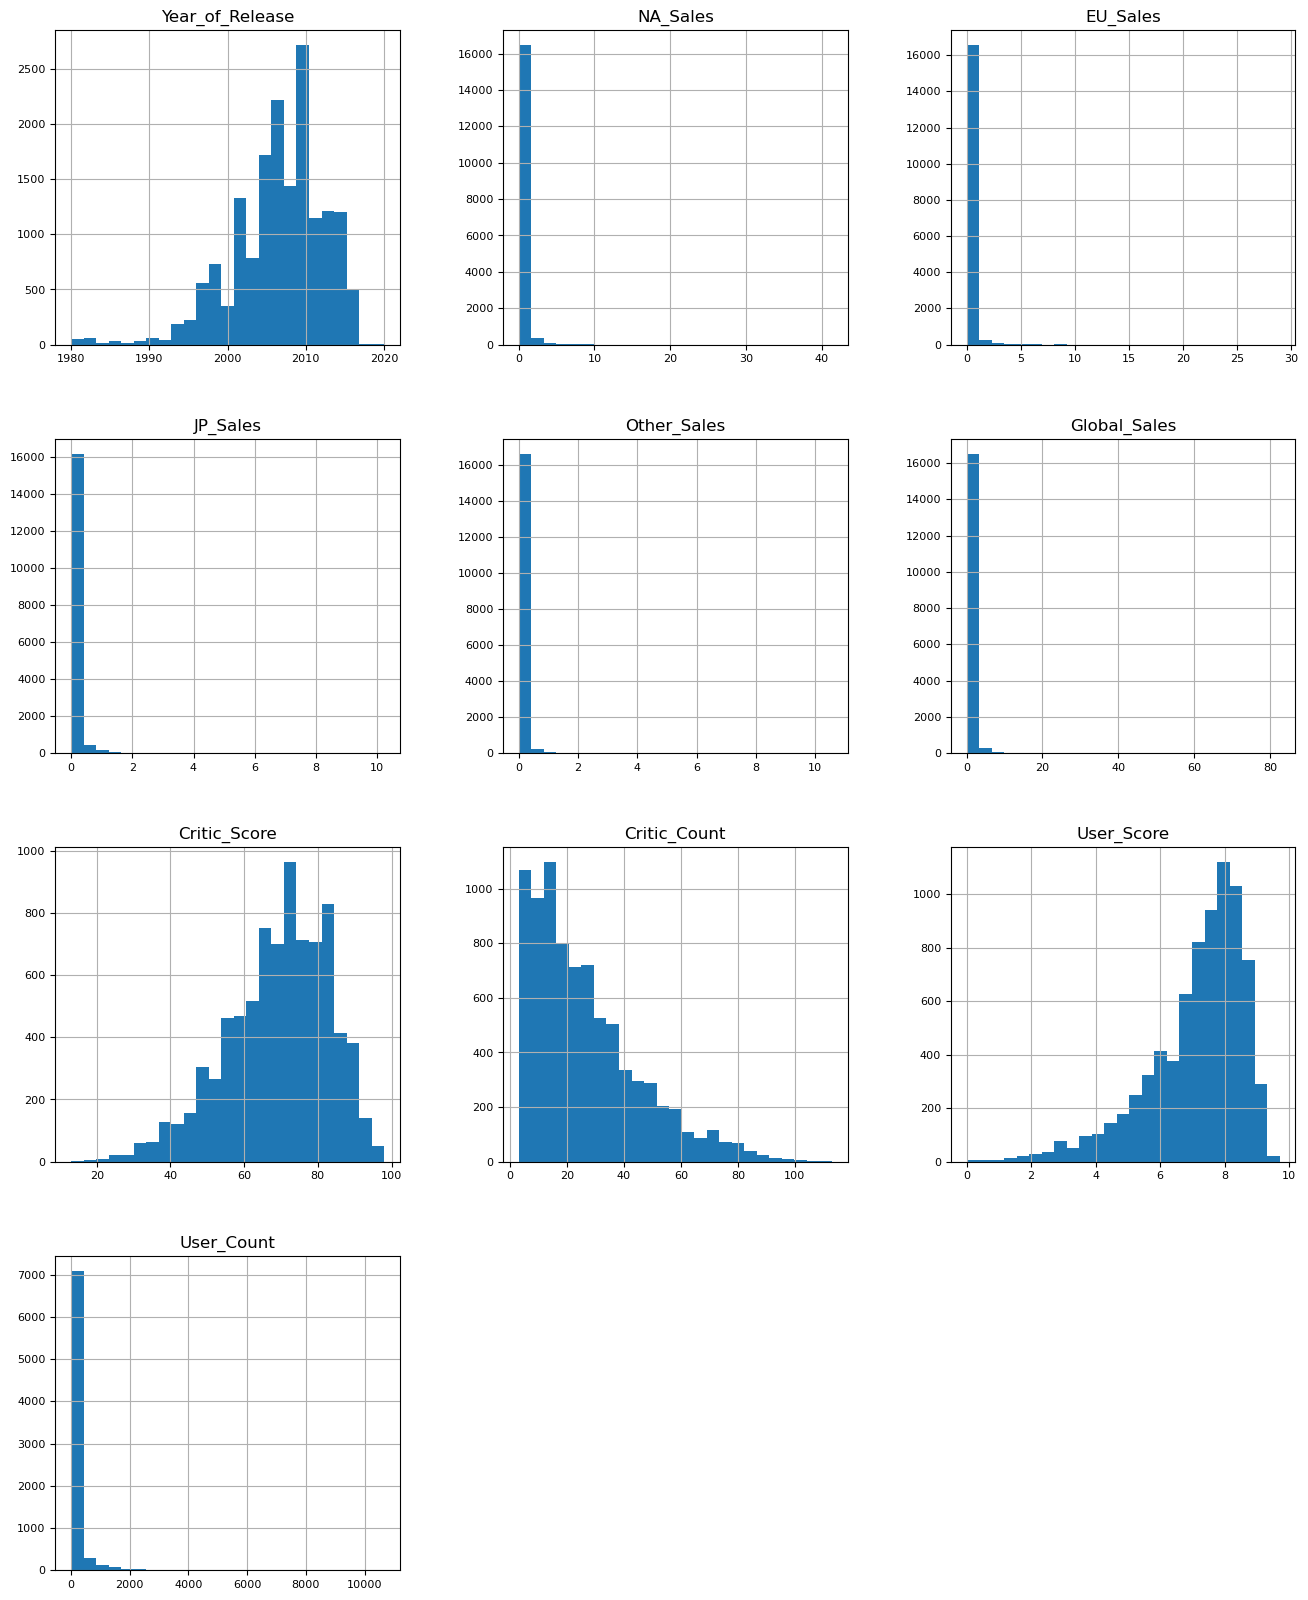

In [9]:
#Collate all numerical variables into one
numerical_data = main_data.select_dtypes(include = ['float64', 'int64'])
#Plot all the distributions into histograms
# Plot the histogram excluding the index column
numerical_data.drop(columns=numerical_data.columns[0]).hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8)

# Show the plot
plt.show()


## Data Cleaning

#### Box plot of numerical_data including outliers

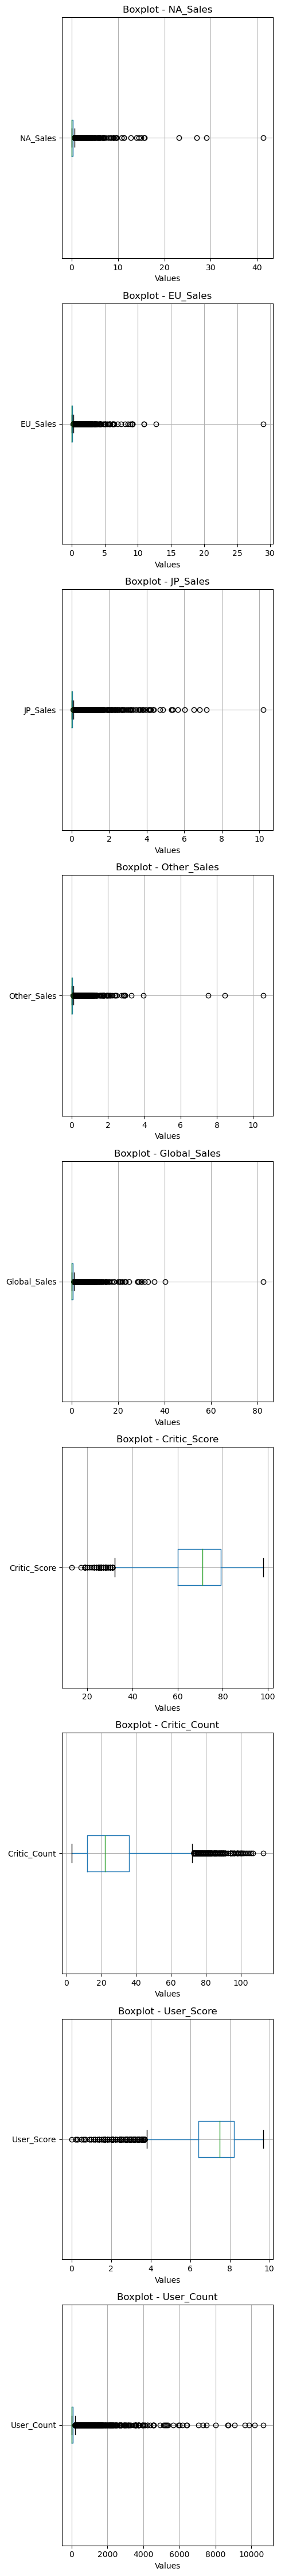

In [10]:
# Columns to exclude from the plot
columns_to_exclude = ['Year_of_Release', 'index']

# Select only the columns to plot
numerical_data_to_plot = numerical_data.drop(columns=columns_to_exclude)

# Set up the subplots based on the number of columns in numerical_data_to_plot
fig, axes = plt.subplots(nrows=len(numerical_data_to_plot.columns), ncols=1, figsize=(5, 5 * len(numerical_data_to_plot.columns)))

# Iterate through each column and create a boxplot in a separate row
for i, column in enumerate(numerical_data_to_plot.columns):
    numerical_data_to_plot.boxplot(column=column, ax=axes[i], vert=False)
    axes[i].set_title(f'Boxplot - {column}')
    axes[i].set_xlabel('Values')

plt.tight_layout()
plt.show()


#### Box plot of filtered_data excluding outliers

A box plot is made for all numerical columns that we have in order to gather data within 25-75 IQR so that we can use a filtered_data dataframe for correlational analysis later on.

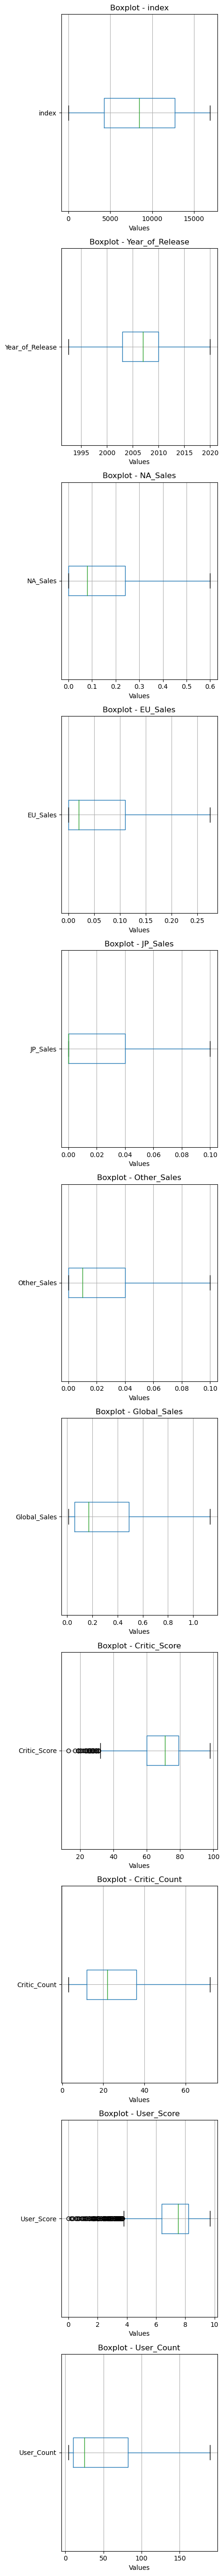

In [11]:
# Assuming numerical_data is your DataFrame containing numerical columns including "Critic_Score" and "User_Score"

# Exclude "Critic_Score" and "User_Score" from filtering
columns_to_filter = [col for col in numerical_data.columns if col not in ["Critic_Score", "User_Score","Year_Of_Release","index"]]

# Calculate the interquartile range (IQR) for each column excluding specified columns
Q1 = numerical_data[columns_to_filter].quantile(0.25)
Q3 = numerical_data[columns_to_filter].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply the bounds to filter out outliers excluding specified columns
filtered_data = numerical_data.copy()  # Create a copy of numerical_data
for col in columns_to_filter:
    filtered_data[col] = filtered_data[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Iterate through each column and create a boxplot in a separate row
fig, axes = plt.subplots(nrows=len(filtered_data.columns), ncols=1, figsize=(5, 5 * len(filtered_data.columns)))

for i, column in enumerate(filtered_data.columns):
    filtered_data.boxplot(column=column, ax=axes[i], vert=False)
    axes[i].set_title(f'Boxplot - {column}')
    axes[i].set_xlabel('Values')

plt.tight_layout()
plt.show()


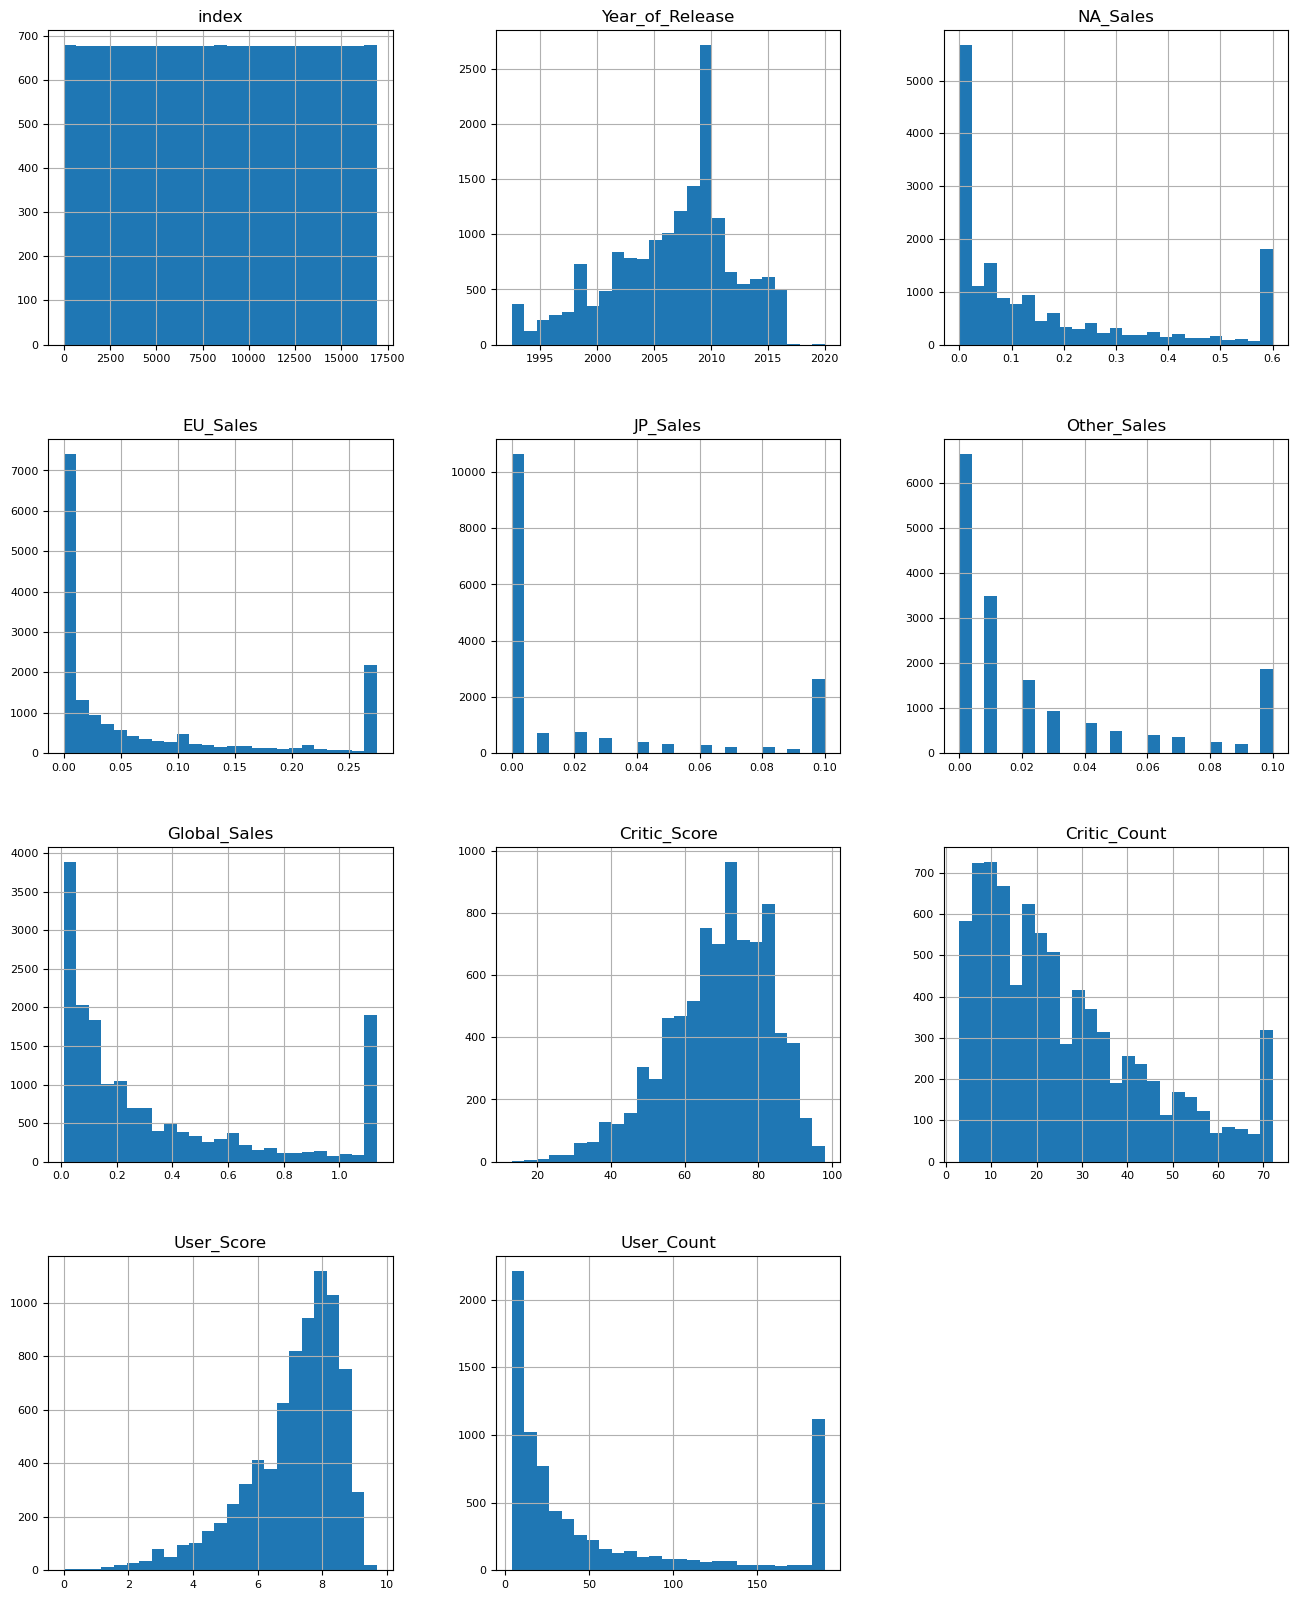

In [12]:
filtered_data.hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8); # ; 

# Sales Analysis

In [13]:
# Group by 'Name' and sum the sales columns
aggregated_by_sales = main_data.agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
})

aggregated_by_sales = pd.DataFrame(aggregated_by_sales)

# Reset index to convert index into a column
aggregated_by_sales.reset_index(inplace=True)

# Add column names
aggregated_by_sales.columns = ['Region', 'Sales']


#Sort by sales descending
aggregated_by_sales = aggregated_by_sales.sort_values(by='Sales', ascending=False)

# Add a new index column representing the ranking
aggregated_by_sales['Rank'] = range(1, len(aggregated_by_sales) + 1)

# Set the 'Rank' column as the index
aggregated_by_sales.set_index('Rank', inplace=True)

aggregated_by_sales.head()


,Region,Sales
Rank,,
1,NA_Sales,4509.45
2,EU_Sales,2485.88
3,JP_Sales,1323.27
4,Other_Sales,810.19


## Sales Distribution

C:\Users\ignis\AppData\Local\Temp\ipykernel_21832\2162301092.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemline, baseline = ax.stem(aggregated_by_sales['Region'], aggregated_by_sales['Sales'], basefmt=" ", linefmt="-", markerfmt="o", use_line_collection=True)


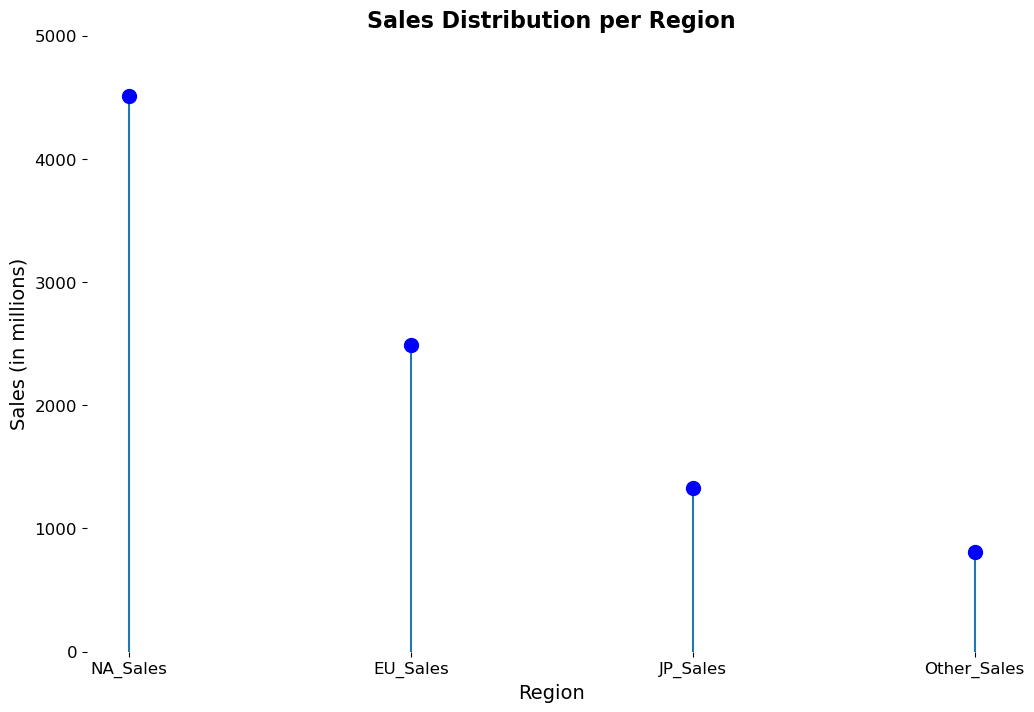

In [14]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting lollipop chart with larger marker size
markerline, stemline, baseline = ax.stem(aggregated_by_sales['Region'], aggregated_by_sales['Sales'], basefmt=" ", linefmt="-", markerfmt="o", use_line_collection=True)

# Set marker properties
plt.setp(markerline, color='blue', markersize=10)

# Set maximum value for y-axis
ax.set_ylim(0, 5000)

# Add labels and title with adjusted font properties
ax.set_title('Sales Distribution per Region', fontsize=16, fontweight='bold')
ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Sales (in millions)', fontsize=14)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show plot
plt.show()


C:\Users\ignis\AppData\Local\Temp\ipykernel_21832\128838796.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 1, 1, 1])


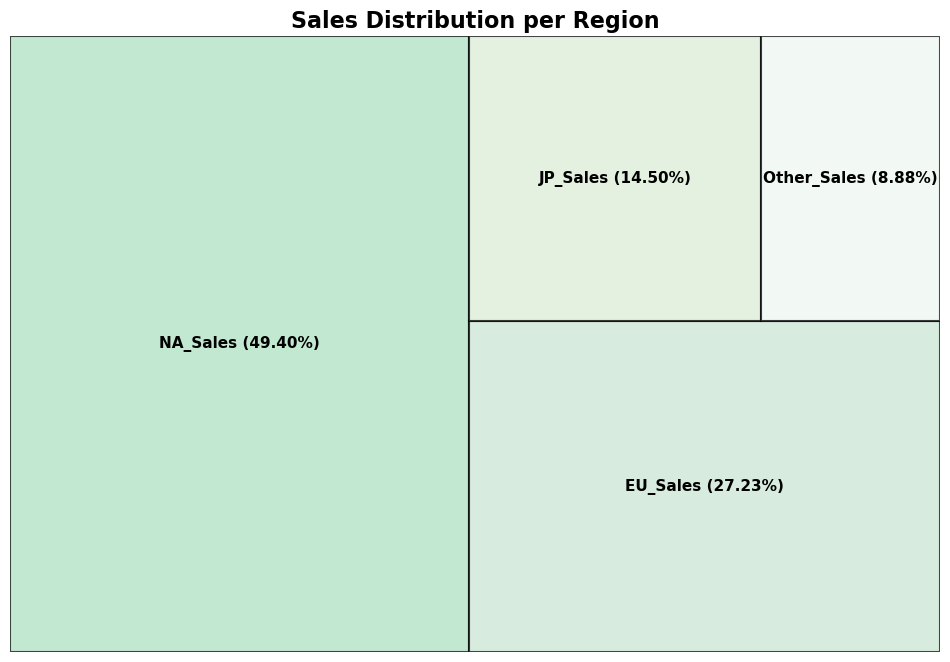

In [15]:
import matplotlib.pyplot as plt
import squarify

# Calculate total sales
total_sales = aggregated_by_sales['Sales'].sum()

# Calculate percentage contribution
aggregated_by_sales['Percentage'] = (aggregated_by_sales['Sales'] / total_sales) * 100

# Set figure size
plt.figure(figsize=(12, 8))

# Define pastel green color
pastel_green = "#a9dfbf"

# Plotting treemap chart with custom labels, adjusted color, edge color, and line width
squarify.plot(sizes=aggregated_by_sales['Sales'], 
              label=aggregated_by_sales.apply(lambda x: f"{x['Region']} ({x['Percentage']:.2f}%)", axis=1), 
              color=[pastel_green, "#c6e4d0", "#d9ead3", "#edf7f2"],  # Adjusted colors maintaining hue changes
              alpha=0.7,
              text_kwargs={'fontsize': 11, 'fontweight': 'bold'},  # Customize label font properties
              edgecolor='black',  # Set edge color
              linewidth=1.5)  # Set line width

# Add title
plt.title('Sales Distribution per Region', fontsize=16, fontweight='bold')

# Remove axis
plt.axis('off')

# Adjust layout to show edges on all sides
plt.tight_layout(rect=[0, 1, 1, 1])

# Save plot with a transparent background
plt.savefig('Sales Distribution per Region.png', transparent=True)

# Show plot
plt.show()


# Genre Analysis

### Which video games have exhibited higher sales figures globally and how do social games compare to them?

#### Looking into video game benchmarks

In [16]:
# Define a custom function for concatenating unique non-null values
def concatenate_unique(series):
    non_null_values = series.dropna().unique()
    if len(non_null_values) > 1:
        return ', '.join(map(str, non_null_values))
    elif len(non_null_values) == 1:
        return non_null_values[0]
    else:
        return 'Unknown'

In [17]:
# Group by 'Name' and sum the sales columns
aggregated_by_game_data = main_data.loc[(main_data['Year_of_Release'] >= 2000)].groupby('Name').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'Critic_Count': 'sum',
    'User_Score': 'mean',
    'User_Count': 'sum',
    'Platform': concatenate_unique,
    'Developer': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown',  # Handling empty Series
    'Genre': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown',  # Handling empty Series
    'Rating': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown',  # Handling empty Series
    'Publisher': lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown'  # Handling empty Series
}).reset_index()

# Sort by global sales descending
aggregated_by_game_data = aggregated_by_game_data.sort_values(by='Global_Sales', ascending=False)

# Add a new index column representing the ranking
aggregated_by_game_data['Rank'] = range(1, len(aggregated_by_game_data) + 1)

# Set the 'Rank' column as the index
aggregated_by_game_data.set_index('Rank', inplace=True)

aggregated_by_game_data.head(500)


,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform,Developer,Genre,Rating,Publisher
Rank,,,,,,,,,,,,,,,
1,Wii Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.0,8.000,322.0,Wii,Nintendo,Sports,E,Nintendo
2,Grand Theft Auto V,23.84,23.42,1.42,7.90,56.57,96.800000,245.0,8.080,15124.0,"PS3, X360, PS4, XOne, PC",Rockstar North,Action,M,Take-Two Interactive
3,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52,82.000000,73.0,8.300,709.0,Wii,Nintendo,Racing,E,Nintendo
4,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77,80.000000,73.0,8.000,192.0,Wii,Nintendo,Sports,E,Nintendo
5,Call of Duty: Modern Warfare 3,15.54,11.15,0.62,3.29,30.59,81.000000,162.0,2.725,20053.0,"X360, PS3, PC, Wii","Infinity Ward, Sledgehammer Games",Shooter,M,Activision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Personal Trainer: Cooking,0.90,1.00,1.03,0.17,3.11,81.000000,12.0,7.800,10.0,DS,Indies Zero,Misc,E,Nintendo
497,The Legend of Zelda: A Link Between Worlds,1.40,1.01,0.46,0.23,3.10,91.000000,81.0,8.900,1057.0,3DS,Nintendo,Action,E,Nintendo
498,Rayman Origins,1.10,1.55,0.01,0.42,3.10,85.166667,184.0,8.000,1274.0,"PS3, X360, Wii, PSV, 3DS, PC",UBlart Montpellier,Platform,E10+,Ubisoft


##### What are the current top-performing genres in recent years based on global sales and where do social games stand?

## Genre Overall and Comparison

In [18]:
# List of specific genres
specific_genres = ['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc', 'Racing', 
                   'Platform', 'Fighting', 'Simulation', 'Adventure', 'Strategy', 'Puzzle']

# Filter the dataframe to include only the specified genres
filtered_data = main_data.loc[(main_data['Year_of_Release'] >= 2000) & (main_data['Year_of_Release'] <= 2015) & 
                               (main_data['Genre'].isin(specific_genres))]

# Group by 'Genre' and 'Year_of_Release' and apply custom aggregation
aggregated_by_genre_data = filtered_data.groupby(['Genre', 'Year_of_Release']).agg({
    'Global_Sales': 'median'
}).reset_index()

aggregated_by_genre_data.head(25)


,Genre,Year_of_Release,Global_Sales
0,Action,2000.0,0.325
1,Action,2001.0,0.270
2,Action,2002.0,0.210
3,Action,2003.0,0.190
4,Action,2004.0,0.215
5,Action,2005.0,0.200
6,Action,2006.0,0.110
7,Action,2007.0,0.280
8,Action,2008.0,0.250
9,Action,2009.0,0.220


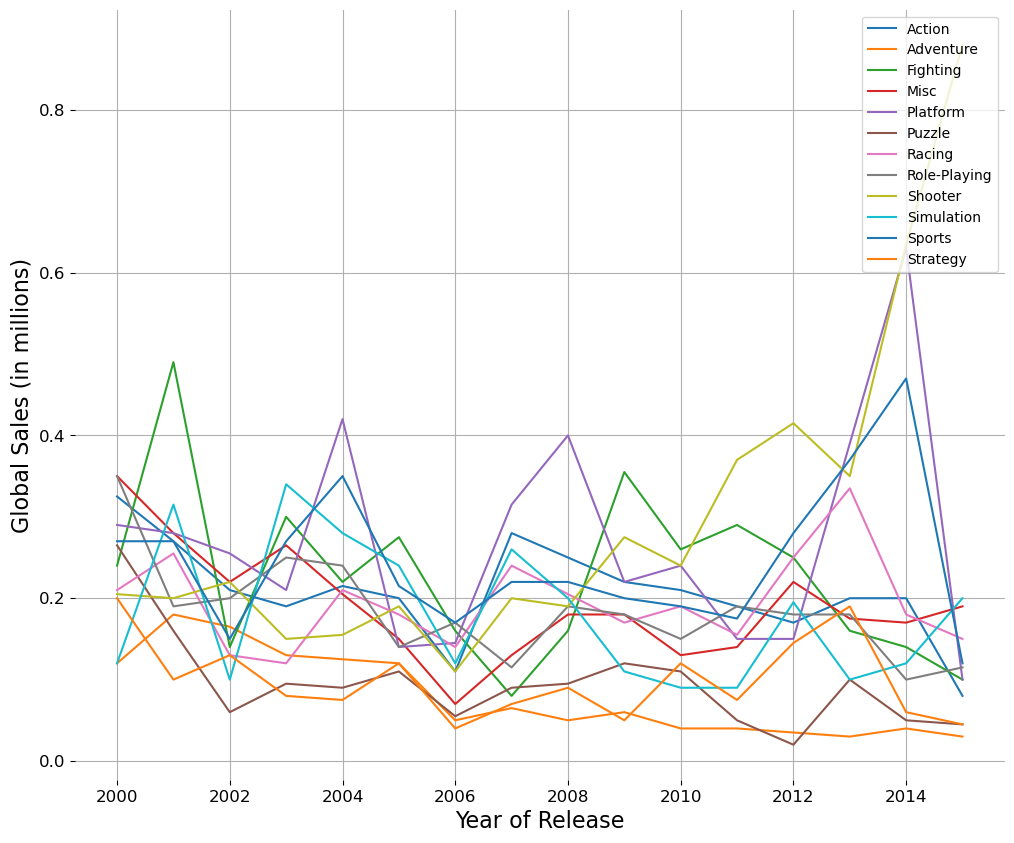

In [19]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting line chart for global sales trend of genres
for genre, data in aggregated_by_genre_data.groupby('Genre'):
    ax.plot(data['Year_of_Release'], data['Global_Sales'], label=genre)

# Set title and labels with adjusted font properties
#ax.set_title('Trend of Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Year of Release', fontsize=16)
ax.set_ylabel('Global Sales (in millions)', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save plot with a transparent background
plt.savefig('Global_Sales_Trend.png', transparent=True)

# Show the plot
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [20]:
# Group by 'Genre' and apply custom aggregation
aggregated_by_genre_data = main_data.loc[main_data['Year_of_Release'] >= 2010].groupby('Genre').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'Critic_Count': 'sum',
    'User_Score': 'mean',
    'User_Count': 'sum',
    'Developer': concatenate_unique,
    'Rating': concatenate_unique,
    'Publisher': concatenate_unique,
    'Name': concatenate_unique,
}).reset_index()

# Sort by 'Global_Sales' in descending order
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='Global_Sales', ascending=False)

# Add a new index column representing the ranking
aggregated_by_genre_data['Rank'] = range(1, len(aggregated_by_genre_data) + 1)

# Set the 'Rank' column as the index
aggregated_by_genre_data.set_index('Rank', inplace=True)

aggregated_by_genre_data.head(25)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name
Rank,,,,,,,,,,,,,,
1,Action,293.93,235.96,72.84,77.27,680.38,68.920943,22228.0,6.776076,243253.0,"Rockstar North, Electronic Arts, Naughty Dog, ...","M, E, T, E10+, EC","Take-Two Interactive, Electronic Arts, Sony Co...","Grand Theft Auto V, FIFA Soccer 13, Uncharted ..."
2,Shooter,242.79,176.74,14.99,58.56,493.22,71.815287,12954.0,6.486228,227369.0,"Infinity Ward, Sledgehammer Games, Treyarch, I...","M, T, E10+, E","Activision, Microsoft Game Studios, Electronic...","Call of Duty: Modern Warfare 3, Call of Duty: ..."
3,Role-Playing,118.17,80.70,108.49,25.99,333.14,73.046693,9399.0,7.283955,166875.0,"Bethesda Game Studios, Blizzard Entertainment,...","M, T, E, E10+","Nintendo, Bethesda Softworks, Activision, Micr...","Pokemon Black/Pokemon White, Pokemon X/Pokemon..."
4,Sports,158.71,118.17,15.52,39.67,332.36,70.847584,6641.0,5.898750,28545.0,"EA Sports, EA Sports, EA Vancouver, Pipeworks ...","E, E10+, T","Electronic Arts, 505 Games, Microsoft Game Stu...","FIFA 16, FIFA 17, Zumba Fitness, FIFA 12, FIFA..."
5,Misc,130.93,69.55,24.93,21.48,247.04,69.310345,3377.0,6.649324,6220.0,"Good Science Studio, Ubisoft, Nd Cube, Nintend...","E, E10+, T, M, EC","Microsoft Game Studios, Ubisoft, Nintendo, Son...","Kinect Adventures!, Just Dance 3, Just Dance 2..."
6,Racing,49.51,57.25,7.96,15.70,130.48,70.812500,4615.0,6.393243,26059.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M","Nintendo, Sony Computer Entertainment, Microso...","Mario Kart 7, Gran Turismo 5, Mario Kart 8, Fo..."
7,Platform,55.10,38.63,15.82,10.81,120.33,74.432990,3603.0,7.073585,22924.0,"Nintendo, Nintendo EAD Tokyo, Retro Studios, M...","E, E10+, T","Nintendo, Sony Computer Entertainment, Disney ...","Super Mario 3D Land, New Super Mario Bros. 2, ..."
8,Fighting,40.04,20.74,14.20,8.50,83.41,69.904762,3993.0,6.967910,13327.0,"NetherRealm Studios, Warner Bros. Interactive ...","M, T, E10+","Nintendo, Warner Bros. Interactive Entertainme...","Super Smash Bros. for Wii U and 3DS, Mortal Ko..."
9,Simulation,27.56,26.69,13.30,5.74,73.31,64.629630,1785.0,6.131034,13423.0,"Nintendo, Maxis, The Sims Studio, Frontier Dev...","E, T, E10+, M","Nintendo, Electronic Arts, Microsoft Game Stud...","Animal Crossing: New Leaf, Tomodachi Life, Nin..."


### What are the top genres in sales globally?

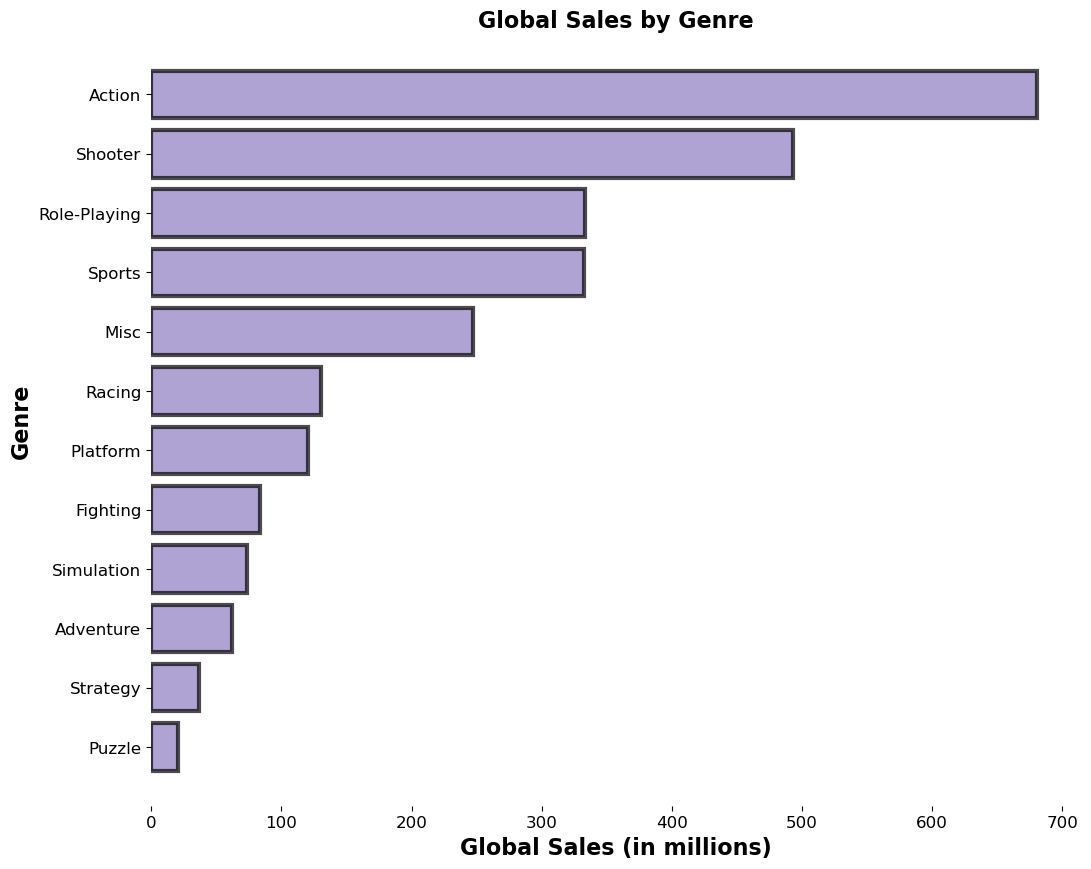

In [21]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting horizontal bar graph
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['Global_Sales'], color='#8e7cc3', alpha=0.7, edgecolor='black', linewidth=3)

# Set title and labels with adjusted font properties
ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Global Sales (in millions)', fontsize=16, fontweight='bold')  # Make x label bold
ax.set_ylabel('Genre', fontsize=16, fontweight='bold')  # Make y label bold

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Global_Sales.png', transparent=True)

# Show the plot
plt.show()


#### Insights: The top 5 genres in sales globally includes: Action, Sports, Shooter, Role Playing and Platform


### Are certain genres more popular in specific regions, such as North America (NA), Europe (EU), Japan (JP) or others?

### NA Sales by Genre

In [22]:
#NA sort values descendingly first
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='NA_Sales', ascending=False)
aggregated_by_genre_data

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name
Rank,,,,,,,,,,,,,,
1,Action,293.93,235.96,72.84,77.27,680.38,68.920943,22228.0,6.776076,243253.0,"Rockstar North, Electronic Arts, Naughty Dog, ...","M, E, T, E10+, EC","Take-Two Interactive, Electronic Arts, Sony Co...","Grand Theft Auto V, FIFA Soccer 13, Uncharted ..."
2,Shooter,242.79,176.74,14.99,58.56,493.22,71.815287,12954.0,6.486228,227369.0,"Infinity Ward, Sledgehammer Games, Treyarch, I...","M, T, E10+, E","Activision, Microsoft Game Studios, Electronic...","Call of Duty: Modern Warfare 3, Call of Duty: ..."
4,Sports,158.71,118.17,15.52,39.67,332.36,70.847584,6641.0,5.898750,28545.0,"EA Sports, EA Sports, EA Vancouver, Pipeworks ...","E, E10+, T","Electronic Arts, 505 Games, Microsoft Game Stu...","FIFA 16, FIFA 17, Zumba Fitness, FIFA 12, FIFA..."
5,Misc,130.93,69.55,24.93,21.48,247.04,69.310345,3377.0,6.649324,6220.0,"Good Science Studio, Ubisoft, Nd Cube, Nintend...","E, E10+, T, M, EC","Microsoft Game Studios, Ubisoft, Nintendo, Son...","Kinect Adventures!, Just Dance 3, Just Dance 2..."
3,Role-Playing,118.17,80.70,108.49,25.99,333.14,73.046693,9399.0,7.283955,166875.0,"Bethesda Game Studios, Blizzard Entertainment,...","M, T, E, E10+","Nintendo, Bethesda Softworks, Activision, Micr...","Pokemon Black/Pokemon White, Pokemon X/Pokemon..."
7,Platform,55.10,38.63,15.82,10.81,120.33,74.432990,3603.0,7.073585,22924.0,"Nintendo, Nintendo EAD Tokyo, Retro Studios, M...","E, E10+, T","Nintendo, Sony Computer Entertainment, Disney ...","Super Mario 3D Land, New Super Mario Bros. 2, ..."
6,Racing,49.51,57.25,7.96,15.70,130.48,70.812500,4615.0,6.393243,26059.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M","Nintendo, Sony Computer Entertainment, Microso...","Mario Kart 7, Gran Turismo 5, Mario Kart 8, Fo..."
8,Fighting,40.04,20.74,14.20,8.50,83.41,69.904762,3993.0,6.967910,13327.0,"NetherRealm Studios, Warner Bros. Interactive ...","M, T, E10+","Nintendo, Warner Bros. Interactive Entertainme...","Super Smash Bros. for Wii U and 3DS, Mortal Ko..."
9,Simulation,27.56,26.69,13.30,5.74,73.31,64.629630,1785.0,6.131034,13423.0,"Nintendo, Maxis, The Sims Studio, Frontier Dev...","E, T, E10+, M","Nintendo, Electronic Arts, Microsoft Game Stud...","Animal Crossing: New Leaf, Tomodachi Life, Nin..."


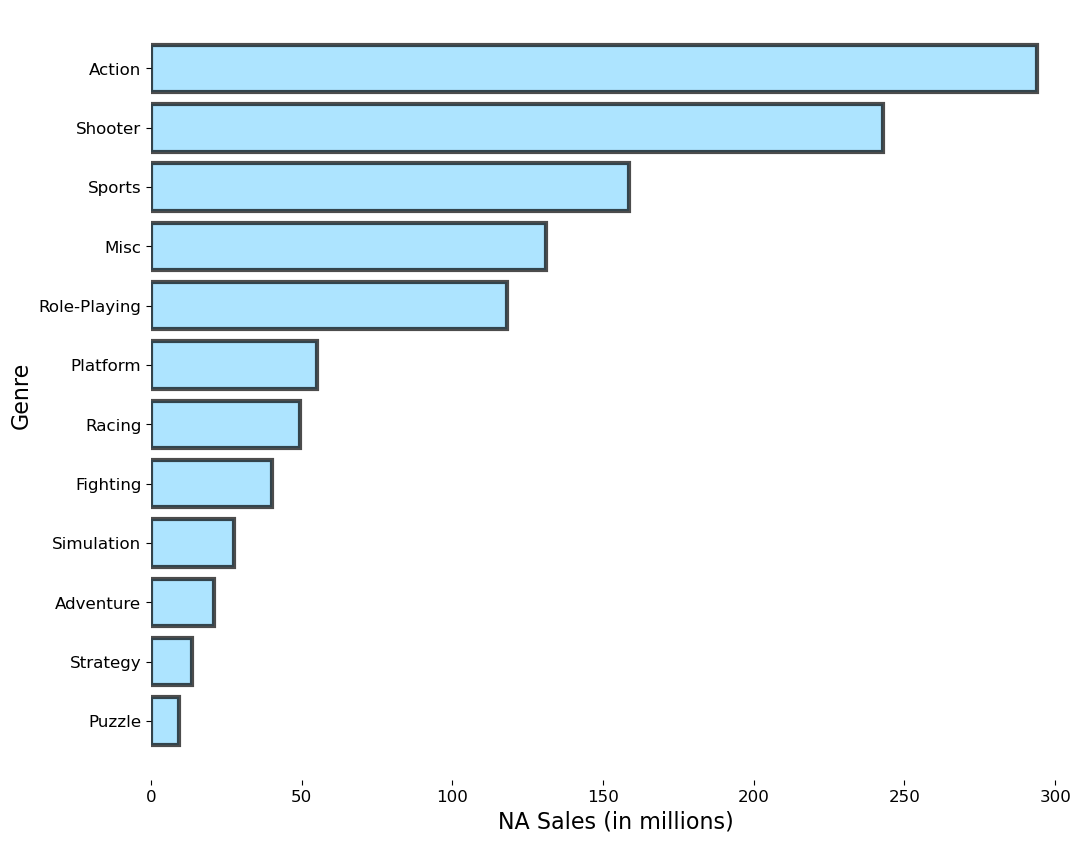

In [23]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['NA_Sales'], color='#8ad9ff', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('NA Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('NA_Sales.png', transparent=True)

# Show the plot
plt.show()


#### Insights: The top 5 genres in sales NA includes: Action, Sports, Shooter, Platform and Misc.


### EU Sales by Genre

In [24]:
#EU
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='EU_Sales', ascending=False)
aggregated_by_genre_data

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name
Rank,,,,,,,,,,,,,,
1,Action,293.93,235.96,72.84,77.27,680.38,68.920943,22228.0,6.776076,243253.0,"Rockstar North, Electronic Arts, Naughty Dog, ...","M, E, T, E10+, EC","Take-Two Interactive, Electronic Arts, Sony Co...","Grand Theft Auto V, FIFA Soccer 13, Uncharted ..."
2,Shooter,242.79,176.74,14.99,58.56,493.22,71.815287,12954.0,6.486228,227369.0,"Infinity Ward, Sledgehammer Games, Treyarch, I...","M, T, E10+, E","Activision, Microsoft Game Studios, Electronic...","Call of Duty: Modern Warfare 3, Call of Duty: ..."
4,Sports,158.71,118.17,15.52,39.67,332.36,70.847584,6641.0,5.898750,28545.0,"EA Sports, EA Sports, EA Vancouver, Pipeworks ...","E, E10+, T","Electronic Arts, 505 Games, Microsoft Game Stu...","FIFA 16, FIFA 17, Zumba Fitness, FIFA 12, FIFA..."
3,Role-Playing,118.17,80.70,108.49,25.99,333.14,73.046693,9399.0,7.283955,166875.0,"Bethesda Game Studios, Blizzard Entertainment,...","M, T, E, E10+","Nintendo, Bethesda Softworks, Activision, Micr...","Pokemon Black/Pokemon White, Pokemon X/Pokemon..."
5,Misc,130.93,69.55,24.93,21.48,247.04,69.310345,3377.0,6.649324,6220.0,"Good Science Studio, Ubisoft, Nd Cube, Nintend...","E, E10+, T, M, EC","Microsoft Game Studios, Ubisoft, Nintendo, Son...","Kinect Adventures!, Just Dance 3, Just Dance 2..."
6,Racing,49.51,57.25,7.96,15.70,130.48,70.812500,4615.0,6.393243,26059.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M","Nintendo, Sony Computer Entertainment, Microso...","Mario Kart 7, Gran Turismo 5, Mario Kart 8, Fo..."
7,Platform,55.10,38.63,15.82,10.81,120.33,74.432990,3603.0,7.073585,22924.0,"Nintendo, Nintendo EAD Tokyo, Retro Studios, M...","E, E10+, T","Nintendo, Sony Computer Entertainment, Disney ...","Super Mario 3D Land, New Super Mario Bros. 2, ..."
9,Simulation,27.56,26.69,13.30,5.74,73.31,64.629630,1785.0,6.131034,13423.0,"Nintendo, Maxis, The Sims Studio, Frontier Dev...","E, T, E10+, M","Nintendo, Electronic Arts, Microsoft Game Stud...","Animal Crossing: New Leaf, Tomodachi Life, Nin..."
8,Fighting,40.04,20.74,14.20,8.50,83.41,69.904762,3993.0,6.967910,13327.0,"NetherRealm Studios, Warner Bros. Interactive ...","M, T, E10+","Nintendo, Warner Bros. Interactive Entertainme...","Super Smash Bros. for Wii U and 3DS, Mortal Ko..."


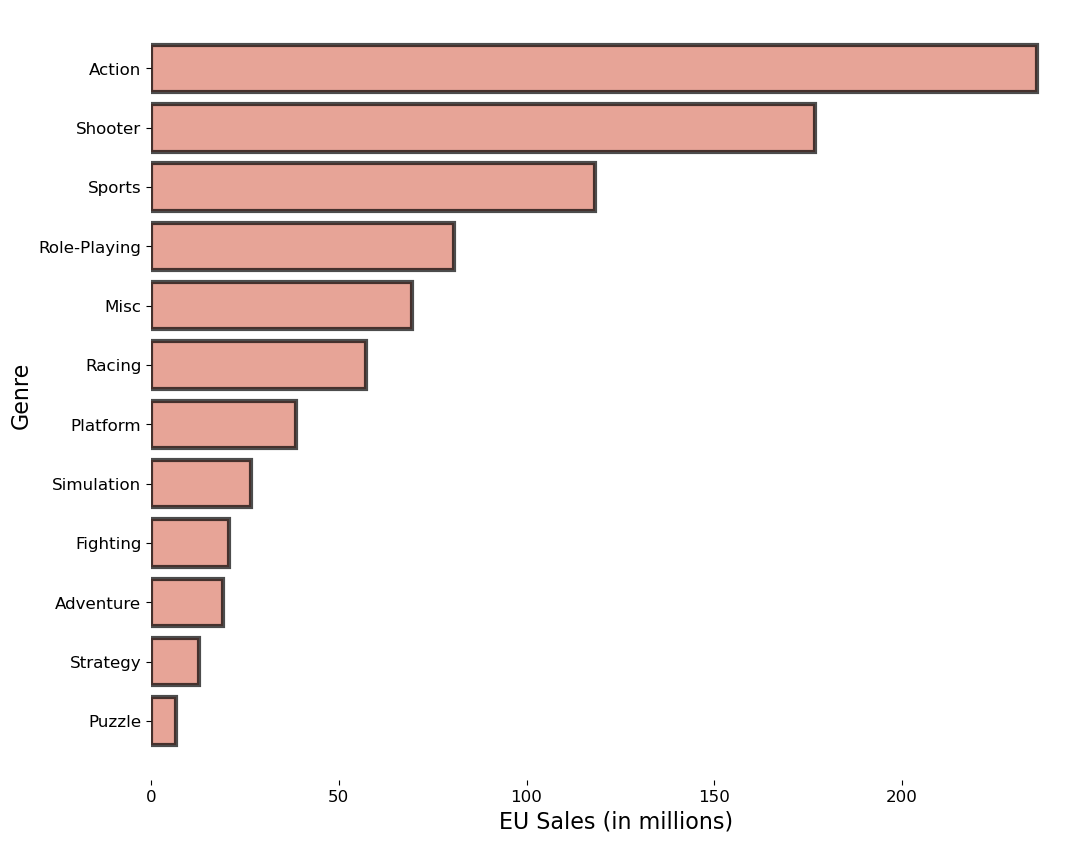

In [25]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['EU_Sales'], color='#dd7e6b', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('EU Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('EU_Sales.png', transparent=True)

# Show the plot
plt.show()

#### Insights: The top 5 genres in sales EU includes: Action, Sports, Shooter, Misc and Racing


### JP Sales by Genre

In [26]:
#JP
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='JP_Sales', ascending=False)
aggregated_by_genre_data

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name
Rank,,,,,,,,,,,,,,
3,Role-Playing,118.17,80.70,108.49,25.99,333.14,73.046693,9399.0,7.283955,166875.0,"Bethesda Game Studios, Blizzard Entertainment,...","M, T, E, E10+","Nintendo, Bethesda Softworks, Activision, Micr...","Pokemon Black/Pokemon White, Pokemon X/Pokemon..."
1,Action,293.93,235.96,72.84,77.27,680.38,68.920943,22228.0,6.776076,243253.0,"Rockstar North, Electronic Arts, Naughty Dog, ...","M, E, T, E10+, EC","Take-Two Interactive, Electronic Arts, Sony Co...","Grand Theft Auto V, FIFA Soccer 13, Uncharted ..."
5,Misc,130.93,69.55,24.93,21.48,247.04,69.310345,3377.0,6.649324,6220.0,"Good Science Studio, Ubisoft, Nd Cube, Nintend...","E, E10+, T, M, EC","Microsoft Game Studios, Ubisoft, Nintendo, Son...","Kinect Adventures!, Just Dance 3, Just Dance 2..."
10,Adventure,20.98,19.22,16.31,5.75,62.32,70.410000,2626.0,7.375000,22881.0,"Team Bondi, Quantic Dream, SuperMassive Games,...","M, E, E10+, T","Take-Two Interactive, Sony Computer Entertainm...","L.A. Noire, Heavy Rain, Until Dawn, Beyond: Tw..."
7,Platform,55.10,38.63,15.82,10.81,120.33,74.432990,3603.0,7.073585,22924.0,"Nintendo, Nintendo EAD Tokyo, Retro Studios, M...","E, E10+, T","Nintendo, Sony Computer Entertainment, Disney ...","Super Mario 3D Land, New Super Mario Bros. 2, ..."
4,Sports,158.71,118.17,15.52,39.67,332.36,70.847584,6641.0,5.898750,28545.0,"EA Sports, EA Sports, EA Vancouver, Pipeworks ...","E, E10+, T","Electronic Arts, 505 Games, Microsoft Game Stu...","FIFA 16, FIFA 17, Zumba Fitness, FIFA 12, FIFA..."
2,Shooter,242.79,176.74,14.99,58.56,493.22,71.815287,12954.0,6.486228,227369.0,"Infinity Ward, Sledgehammer Games, Treyarch, I...","M, T, E10+, E","Activision, Microsoft Game Studios, Electronic...","Call of Duty: Modern Warfare 3, Call of Duty: ..."
8,Fighting,40.04,20.74,14.20,8.50,83.41,69.904762,3993.0,6.967910,13327.0,"NetherRealm Studios, Warner Bros. Interactive ...","M, T, E10+","Nintendo, Warner Bros. Interactive Entertainme...","Super Smash Bros. for Wii U and 3DS, Mortal Ko..."
9,Simulation,27.56,26.69,13.30,5.74,73.31,64.629630,1785.0,6.131034,13423.0,"Nintendo, Maxis, The Sims Studio, Frontier Dev...","E, T, E10+, M","Nintendo, Electronic Arts, Microsoft Game Stud...","Animal Crossing: New Leaf, Tomodachi Life, Nin..."


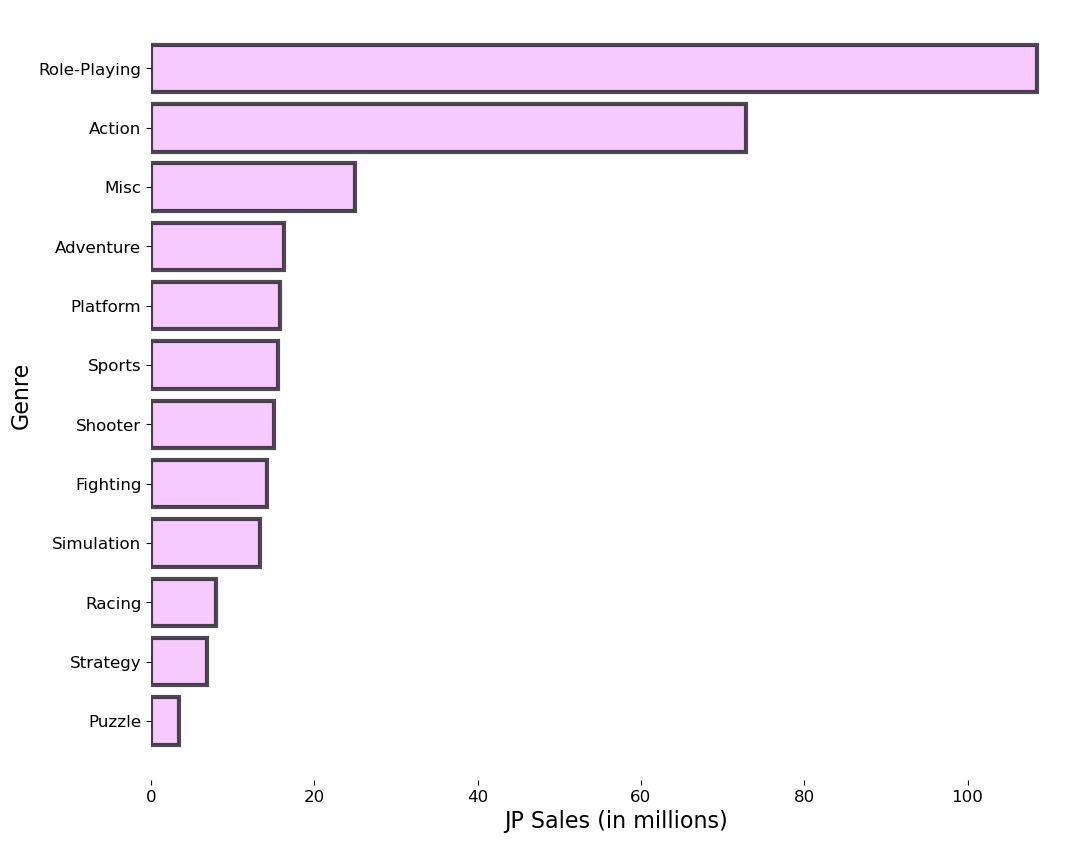

In [27]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['JP_Sales'], color='#f3b2ff', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('JP Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('JP_Sales.png', transparent=True)

# Show the plot
plt.show()

In [28]:
#JP
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='Other_Sales', ascending=False)
aggregated_by_genre_data

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name
Rank,,,,,,,,,,,,,,
1,Action,293.93,235.96,72.84,77.27,680.38,68.920943,22228.0,6.776076,243253.0,"Rockstar North, Electronic Arts, Naughty Dog, ...","M, E, T, E10+, EC","Take-Two Interactive, Electronic Arts, Sony Co...","Grand Theft Auto V, FIFA Soccer 13, Uncharted ..."
2,Shooter,242.79,176.74,14.99,58.56,493.22,71.815287,12954.0,6.486228,227369.0,"Infinity Ward, Sledgehammer Games, Treyarch, I...","M, T, E10+, E","Activision, Microsoft Game Studios, Electronic...","Call of Duty: Modern Warfare 3, Call of Duty: ..."
4,Sports,158.71,118.17,15.52,39.67,332.36,70.847584,6641.0,5.898750,28545.0,"EA Sports, EA Sports, EA Vancouver, Pipeworks ...","E, E10+, T","Electronic Arts, 505 Games, Microsoft Game Stu...","FIFA 16, FIFA 17, Zumba Fitness, FIFA 12, FIFA..."
3,Role-Playing,118.17,80.70,108.49,25.99,333.14,73.046693,9399.0,7.283955,166875.0,"Bethesda Game Studios, Blizzard Entertainment,...","M, T, E, E10+","Nintendo, Bethesda Softworks, Activision, Micr...","Pokemon Black/Pokemon White, Pokemon X/Pokemon..."
5,Misc,130.93,69.55,24.93,21.48,247.04,69.310345,3377.0,6.649324,6220.0,"Good Science Studio, Ubisoft, Nd Cube, Nintend...","E, E10+, T, M, EC","Microsoft Game Studios, Ubisoft, Nintendo, Son...","Kinect Adventures!, Just Dance 3, Just Dance 2..."
6,Racing,49.51,57.25,7.96,15.70,130.48,70.812500,4615.0,6.393243,26059.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M","Nintendo, Sony Computer Entertainment, Microso...","Mario Kart 7, Gran Turismo 5, Mario Kart 8, Fo..."
7,Platform,55.10,38.63,15.82,10.81,120.33,74.432990,3603.0,7.073585,22924.0,"Nintendo, Nintendo EAD Tokyo, Retro Studios, M...","E, E10+, T","Nintendo, Sony Computer Entertainment, Disney ...","Super Mario 3D Land, New Super Mario Bros. 2, ..."
8,Fighting,40.04,20.74,14.20,8.50,83.41,69.904762,3993.0,6.967910,13327.0,"NetherRealm Studios, Warner Bros. Interactive ...","M, T, E10+","Nintendo, Warner Bros. Interactive Entertainme...","Super Smash Bros. for Wii U and 3DS, Mortal Ko..."
10,Adventure,20.98,19.22,16.31,5.75,62.32,70.410000,2626.0,7.375000,22881.0,"Team Bondi, Quantic Dream, SuperMassive Games,...","M, E, E10+, T","Take-Two Interactive, Sony Computer Entertainm...","L.A. Noire, Heavy Rain, Until Dawn, Beyond: Tw..."


#### Insights: The top 5 genres in sales JP includes: Role Playing, Action, Sports, Platform and Misc. Shooter genre is top 12.


### Other Sales by Genre

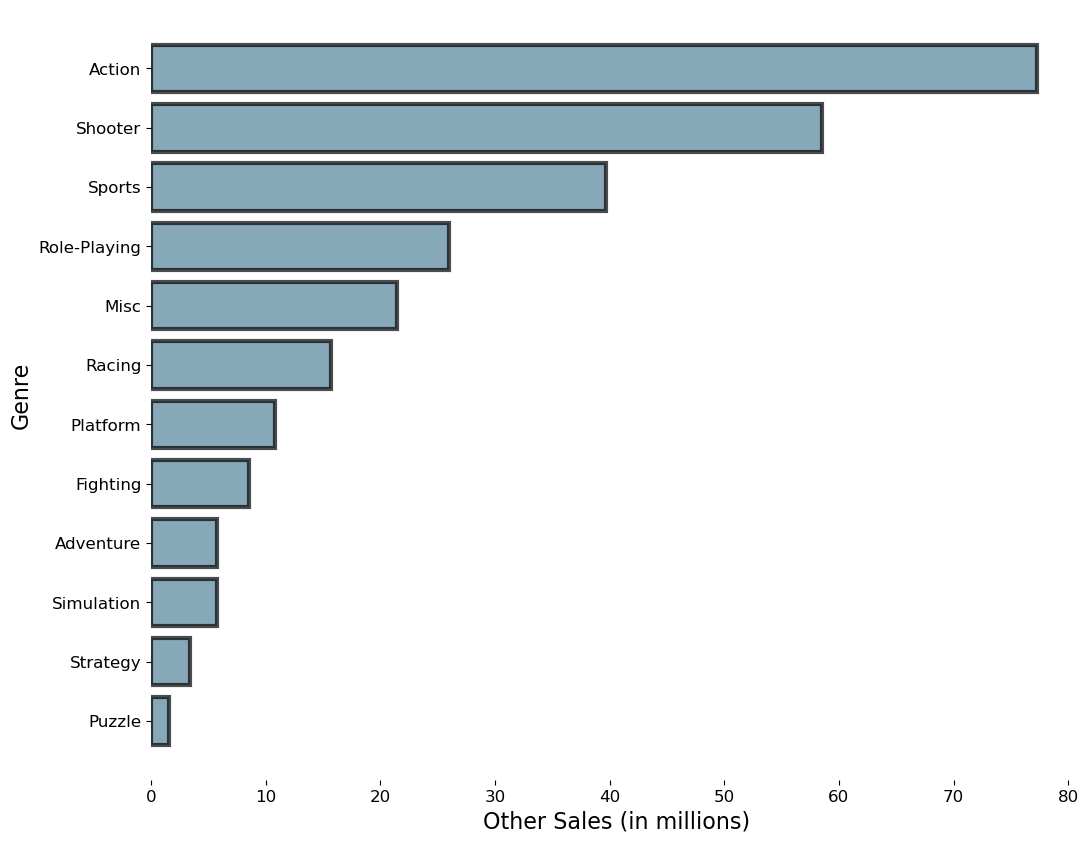

In [29]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['Other_Sales'], color='#54849c', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Other Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Other_Sales.png', transparent=True)

# Show the plot
plt.show()

In [30]:
# Sort by 'Global_Sales' in descending order
aggregated_by_genre_data = aggregated_by_genre_data.sort_values(by='Global_Sales', ascending=False)

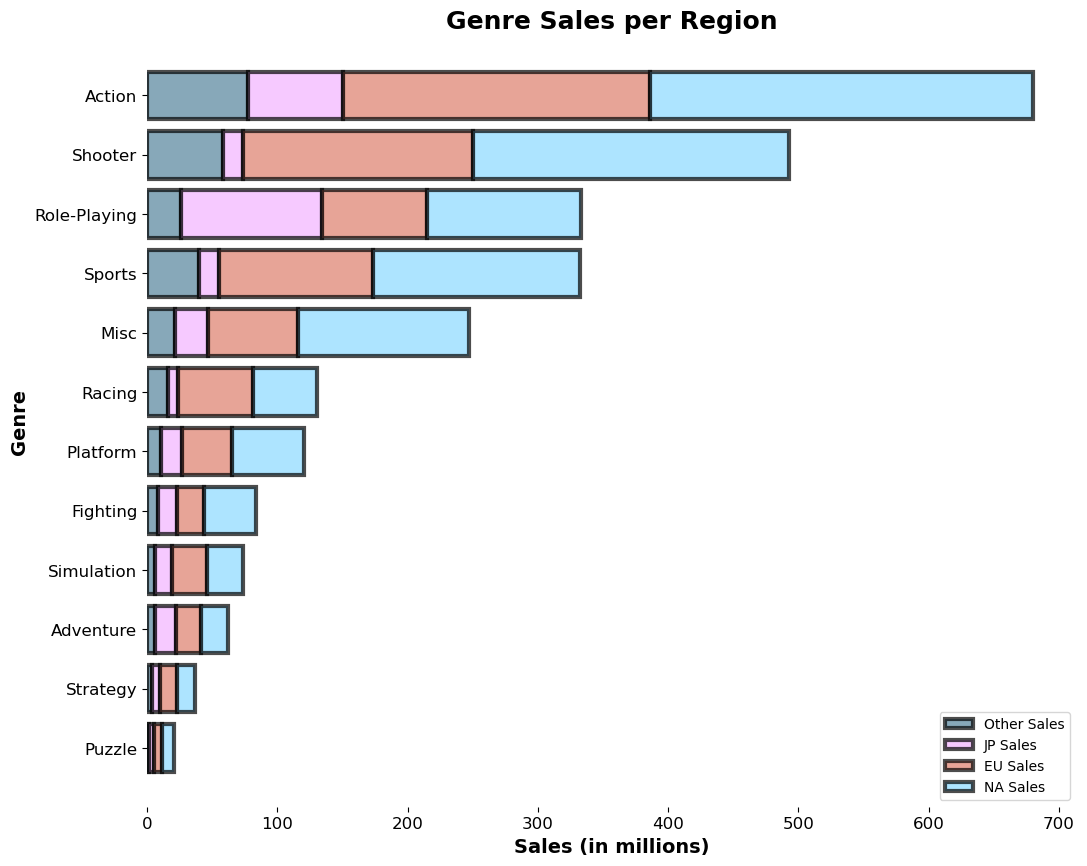

In [31]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting stacked horizontal bar graph for Other Sales
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['Other_Sales'], color='#54849c', label='Other Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for JP Sales
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['JP_Sales'], left=aggregated_by_genre_data['Other_Sales'], color='#f3b2ff', label='JP Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for EU Sales
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['EU_Sales'], left=aggregated_by_genre_data['Other_Sales']+aggregated_by_genre_data['JP_Sales'], color='#dd7e6b', label='EU Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for NA Sales
ax.barh(aggregated_by_genre_data['Genre'], aggregated_by_genre_data['NA_Sales'], left=aggregated_by_genre_data['Other_Sales']+aggregated_by_genre_data['JP_Sales']+aggregated_by_genre_data['EU_Sales'], color='#8ad9ff', label='NA Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Set title and labels with adjusted font properties
ax.set_title('Genre Sales per Region', fontsize=18, fontweight='bold')
ax.set_xlabel('Sales (in millions)', fontsize=14,fontweight='bold')
ax.set_ylabel('Genre', fontsize=14,fontweight='bold')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Add legend
ax.legend()

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Sales_by_Genre_and_Region.png', transparent=True)

# Show the plot
plt.show()


#### Insights: 

# Platform Analysis

### Which gaming platforms have consistently demonstrated the highest sales volumes globally?

##### Getting unique values in order to map and classify

In [32]:
main_data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

##### Creating a dictionary and mapping

In [33]:
#Creation of dictionary to map
console_brand_mapping = {
    'PLAYSTATION': ['PS3','PS2','PS4','PS','PSP'],
    'MICROSOFT': ['X360','PC'],
    'NINTENDO': ['Wii','NES','GB','DS','SNES','GBA','3DS','N64','WiiU','GC',],
    'OTHERS':['GC','GEN','DC','2600','SAT','SCD','WS','NG','TG16','3DO','GG','PCFX','2600']
}


# Reversed mapping dictionary using a dictionary comprehension
brand_console_mapping = {console: brand for brand, consoles in console_brand_mapping.items() for console in consoles}

# Convert both 'Platform' values and dictionary keys to lowercase for case-insensitive matching
main_data['Brand'] = main_data['Platform'].str.upper().map({k.upper(): v for k, v in brand_console_mapping.items()})


In [34]:
main_data.loc[main_data['Year_of_Release'] >= 2010]

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Brand
14,14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,MICROSOFT
16,16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,PLAYSTATION
23,23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,MICROSOFT
27,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NaN,NaN,NaN,NaN,NaN,NaN,NINTENDO
29,29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M,MICROSOFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,16916,Cabela's Monster Buck Hunter,Wii,2010.0,Sports,Activision,0.57,0.00,0.00,0.03,0.61,NaN,NaN,NaN,NaN,FUN Labs,T,NINTENDO
16918,16918,Dark Souls II,PS4,2015.0,Role-Playing,Namco Bandai Games,0.21,0.23,0.08,0.09,0.60,NaN,NaN,NaN,NaN,NaN,NaN,PLAYSTATION
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.60,43.0,25.0,3.6,295.0,Gearbox Software,M,PLAYSTATION
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.60,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M,PLAYSTATION


In [35]:
# Group by 'Brand' and apply custom aggregation, filtering for the past 10 years starting from 2010
platform_linetrend_data = main_data.loc[(main_data['Year_of_Release'] >= 2010) & (main_data['Year_of_Release'] <= 2015)].groupby(['Brand','Year_of_Release']).agg({
    'Global_Sales': 'sum',
    'Platform': concatenate_unique
}).reset_index()

platform_linetrend_data.head(50)


,Brand,Year_of_Release,Global_Sales,Platform
0,MICROSOFT,2010.0,196.31,"X360, PC"
1,MICROSOFT,2011.0,180.93,"X360, PC"
2,MICROSOFT,2012.0,123.55,"X360, PC"
3,MICROSOFT,2013.0,102.25,"X360, PC"
4,MICROSOFT,2014.0,48.71,"X360, PC"
5,MICROSOFT,2015.0,20.50,"X360, PC"
6,NINTENDO,2010.0,216.88,"DS, Wii"
7,NINTENDO,2011.0,151.53,"3DS, Wii, DS"
8,NINTENDO,2012.0,110.92,"3DS, DS, Wii, WiiU"
9,NINTENDO,2013.0,88.46,"3DS, WiiU, Wii, DS"


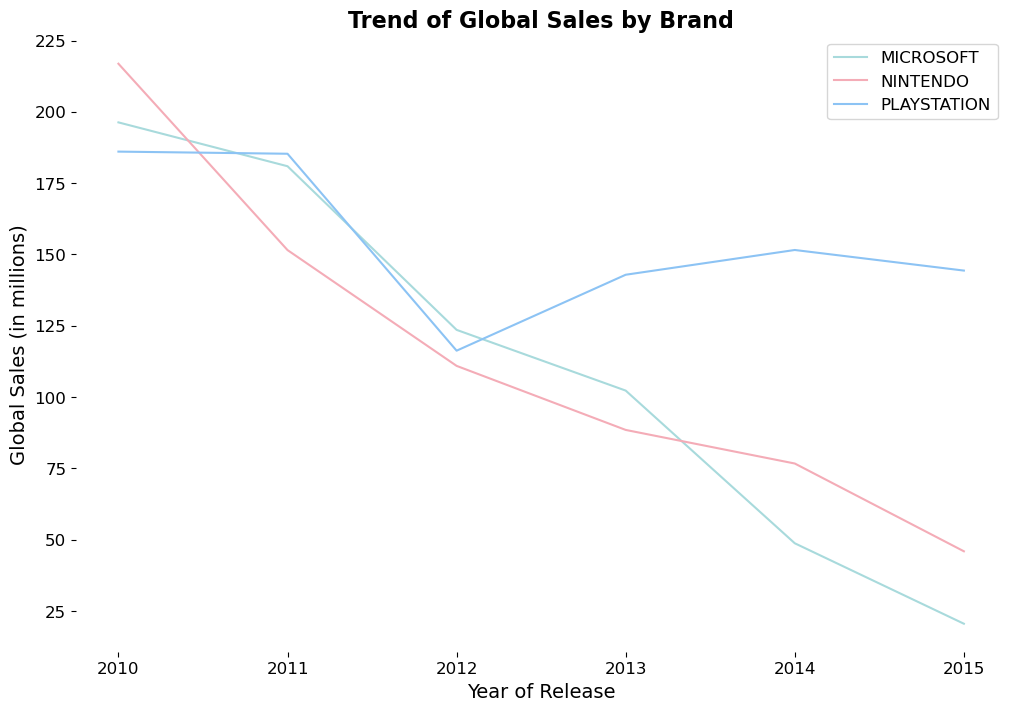

In [36]:
# Set pastel colors for each brand
pastel_colors = ['#a8dadc', '#f4acb7', '#8cc3f4']

# Set figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Group data by brand
grouped_data = platform_linetrend_data.groupby('Brand')

# Plot line chart for each brand with pastel colors
for i, (brand, group) in enumerate(grouped_data):
    ax.plot(group['Year_of_Release'], group['Global_Sales'], label=brand, color=pastel_colors[i % len(pastel_colors)])

# Set title and labels with adjusted font properties
ax.set_title('Trend of Global Sales by Brand', fontsize=16, fontweight='bold')
ax.set_xlabel('Year of Release', fontsize=14)
ax.set_ylabel('Global Sales (in millions)', fontsize=14)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set legend
ax.legend(fontsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save plot with a transparent background
plt.savefig('Global_Sales_Trend.png', transparent=True)

# Show the plot
plt.show()


In [37]:
main_data.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Brand
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,NINTENDO
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NINTENDO
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,NINTENDO
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,NINTENDO
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,NINTENDO


In [38]:
# Group by 'Brand' and apply custom aggregation, filtering for the past 10 years starting from 2010
aggregated_by_platform_data = main_data.loc[main_data['Year_of_Release'] >= 2010].groupby('Brand').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'Critic_Count': 'sum',
    'User_Score': 'mean',
    'User_Count': 'sum',
    'Developer': concatenate_unique,
    'Rating': concatenate_unique,
    'Publisher': concatenate_unique,
    'Name': concatenate_unique,
    'Platform': concatenate_unique
}).reset_index()

aggregated_by_platform_data.head(10)


,Brand,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name,Platform
0,MICROSOFT,376.30,234.91,5.47,61.95,679.04,71.228535,27706.0,6.459886,422691.0,"Good Science Studio, Rockstar North, Infinity ...","E, M, E10+, T, EC, RP","Microsoft Game Studios, Take-Two Interactive, ...","Kinect Adventures!, Grand Theft Auto V, Call o...","X360, PC"
1,NINTENDO,317.35,187.63,165.38,47.56,718.33,67.713062,11973.0,6.905088,50796.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M, EC","Nintendo, Ubisoft, 505 Games, Sega, Capcom, Di...","Pokemon Black/Pokemon White, Pokemon X/Pokemon...","DS, 3DS, Wii, WiiU"
2,PLAYSTATION,359.78,374.35,121.48,143.78,999.31,70.739401,27278.0,6.703058,265414.0,"Rockstar North, Treyarch, Infinity Ward, Sledg...","M, E, T, E10+","Take-Two Interactive, Activision, Sony Compute...","Grand Theft Auto V, Call of Duty: Black Ops 3,...","PS3, PS4, PSP, PS2"


In [39]:
aggregated_by_platform_data = aggregated_by_platform_data.sort_values(by='Global_Sales', ascending=False)

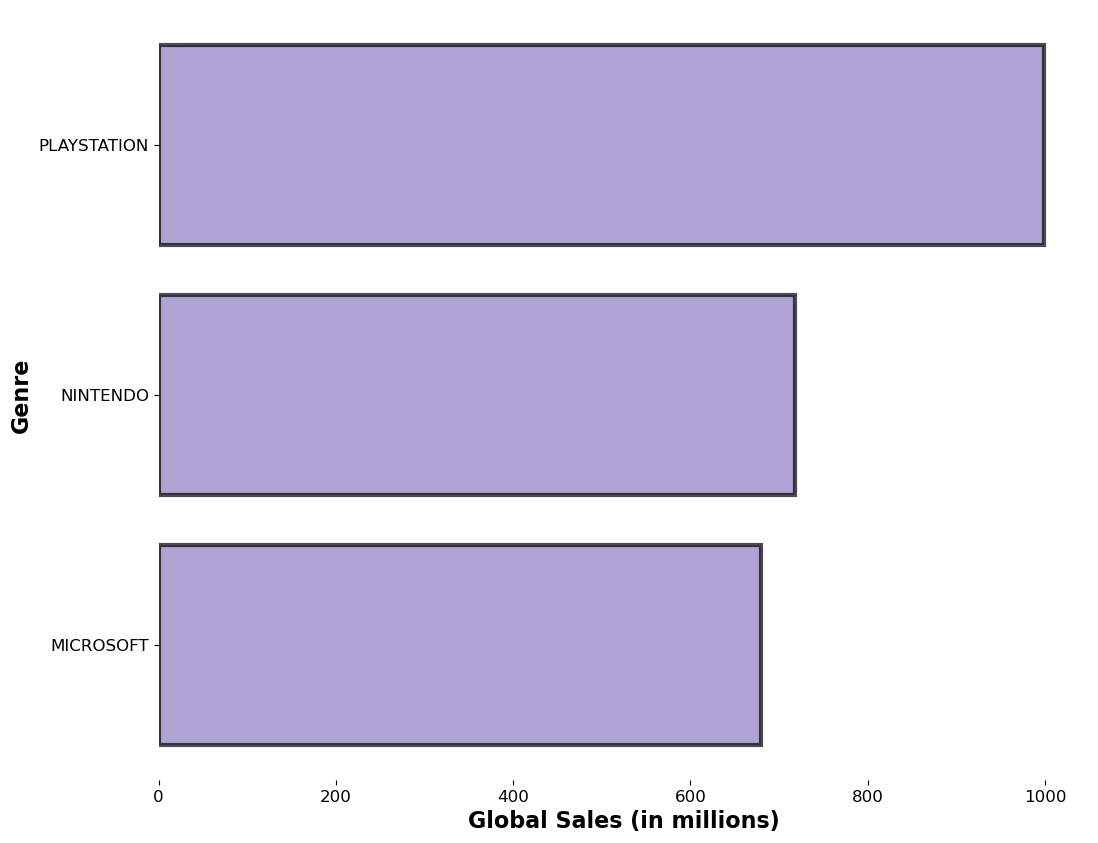

In [40]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting horizontal bar graph
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['Global_Sales'], color='#8e7cc3', alpha=0.7, edgecolor='black', linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Global Sales (in millions)', fontsize=16,fontweight='bold')
ax.set_ylabel('Genre', fontsize=16,fontweight='bold')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Global_Sales_Platform.png', transparent=True)

# Show the plot
plt.show()


#### Insights: Playstation is the most played platform globally followed by Nintendo and Microsoft

## Are there specific platforms dominating certain regions or preferred for specific game genres (social games)?

### NA Sales by Platform

In [41]:
# Sort by 'NA_Sales' in descending order
aggregated_by_platform_data = aggregated_by_platform_data.sort_values(by='NA_Sales', ascending=False)
aggregated_by_platform_data

,Brand,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name,Platform
0,MICROSOFT,376.30,234.91,5.47,61.95,679.04,71.228535,27706.0,6.459886,422691.0,"Good Science Studio, Rockstar North, Infinity ...","E, M, E10+, T, EC, RP","Microsoft Game Studios, Take-Two Interactive, ...","Kinect Adventures!, Grand Theft Auto V, Call o...","X360, PC"
2,PLAYSTATION,359.78,374.35,121.48,143.78,999.31,70.739401,27278.0,6.703058,265414.0,"Rockstar North, Treyarch, Infinity Ward, Sledg...","M, E, T, E10+","Take-Two Interactive, Activision, Sony Compute...","Grand Theft Auto V, Call of Duty: Black Ops 3,...","PS3, PS4, PSP, PS2"
1,NINTENDO,317.35,187.63,165.38,47.56,718.33,67.713062,11973.0,6.905088,50796.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M, EC","Nintendo, Ubisoft, 505 Games, Sega, Capcom, Di...","Pokemon Black/Pokemon White, Pokemon X/Pokemon...","DS, 3DS, Wii, WiiU"


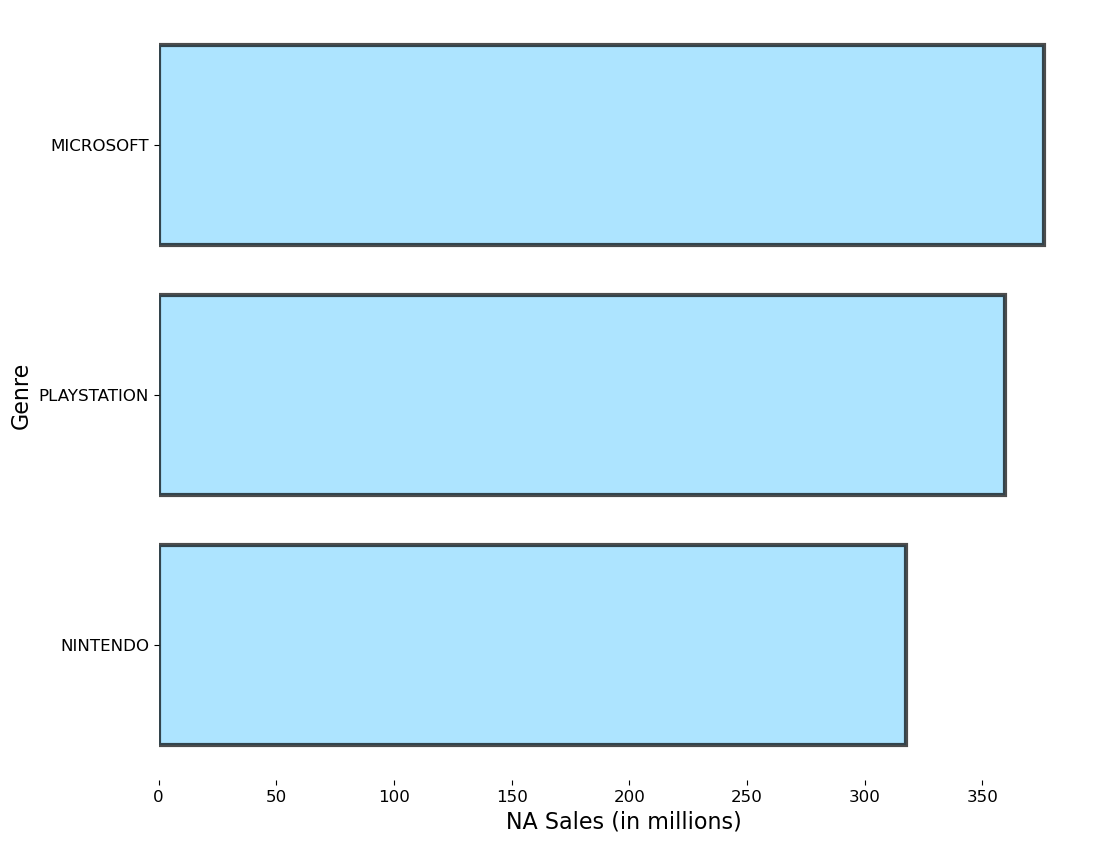

In [42]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['NA_Sales'], color='#8ad9ff', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('NA Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('NA_Sales.png', transparent=True)

# Show the plot
plt.show()


#### Insights: Nintendo is #1 followed by PlayStation and Microsoft

### EU Sales by Platform

In [43]:
# Sort by 'EU_Sales' in descending order
aggregated_by_platform_data = aggregated_by_platform_data.sort_values(by='EU_Sales', ascending=False)
aggregated_by_platform_data

,Brand,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name,Platform
2,PLAYSTATION,359.78,374.35,121.48,143.78,999.31,70.739401,27278.0,6.703058,265414.0,"Rockstar North, Treyarch, Infinity Ward, Sledg...","M, E, T, E10+","Take-Two Interactive, Activision, Sony Compute...","Grand Theft Auto V, Call of Duty: Black Ops 3,...","PS3, PS4, PSP, PS2"
0,MICROSOFT,376.30,234.91,5.47,61.95,679.04,71.228535,27706.0,6.459886,422691.0,"Good Science Studio, Rockstar North, Infinity ...","E, M, E10+, T, EC, RP","Microsoft Game Studios, Take-Two Interactive, ...","Kinect Adventures!, Grand Theft Auto V, Call o...","X360, PC"
1,NINTENDO,317.35,187.63,165.38,47.56,718.33,67.713062,11973.0,6.905088,50796.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M, EC","Nintendo, Ubisoft, 505 Games, Sega, Capcom, Di...","Pokemon Black/Pokemon White, Pokemon X/Pokemon...","DS, 3DS, Wii, WiiU"


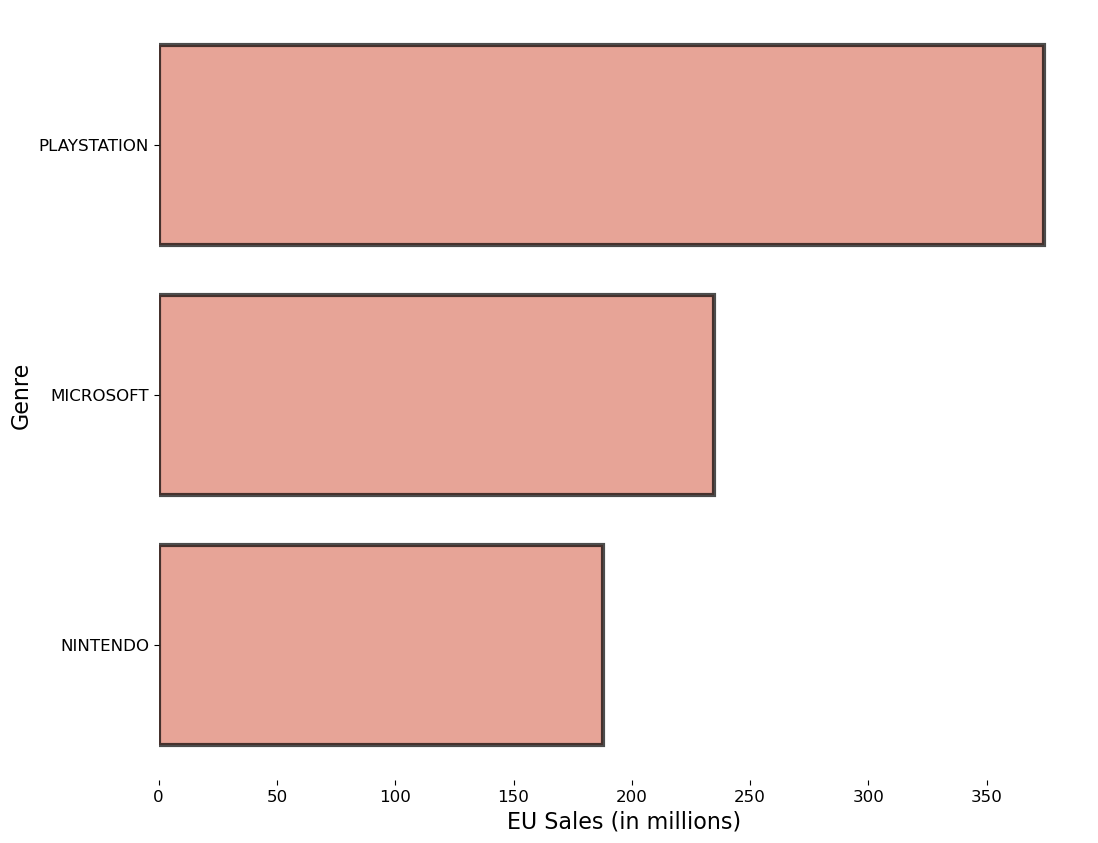

In [44]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['EU_Sales'], color='#dd7e6b', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('EU Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('EU_Sales.png', transparent=True)

# Show the plot
plt.show()

#### Insights: Playstation is #1 followed by Nintendo and Microsoft

### JP Sales by Platform

In [45]:
# Sort by 'JP_Sales' in descending order
aggregated_by_platform_data = aggregated_by_platform_data.sort_values(by='JP_Sales', ascending=False)
aggregated_by_platform_data

,Brand,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name,Platform
1,NINTENDO,317.35,187.63,165.38,47.56,718.33,67.713062,11973.0,6.905088,50796.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M, EC","Nintendo, Ubisoft, 505 Games, Sega, Capcom, Di...","Pokemon Black/Pokemon White, Pokemon X/Pokemon...","DS, 3DS, Wii, WiiU"
2,PLAYSTATION,359.78,374.35,121.48,143.78,999.31,70.739401,27278.0,6.703058,265414.0,"Rockstar North, Treyarch, Infinity Ward, Sledg...","M, E, T, E10+","Take-Two Interactive, Activision, Sony Compute...","Grand Theft Auto V, Call of Duty: Black Ops 3,...","PS3, PS4, PSP, PS2"
0,MICROSOFT,376.30,234.91,5.47,61.95,679.04,71.228535,27706.0,6.459886,422691.0,"Good Science Studio, Rockstar North, Infinity ...","E, M, E10+, T, EC, RP","Microsoft Game Studios, Take-Two Interactive, ...","Kinect Adventures!, Grand Theft Auto V, Call o...","X360, PC"


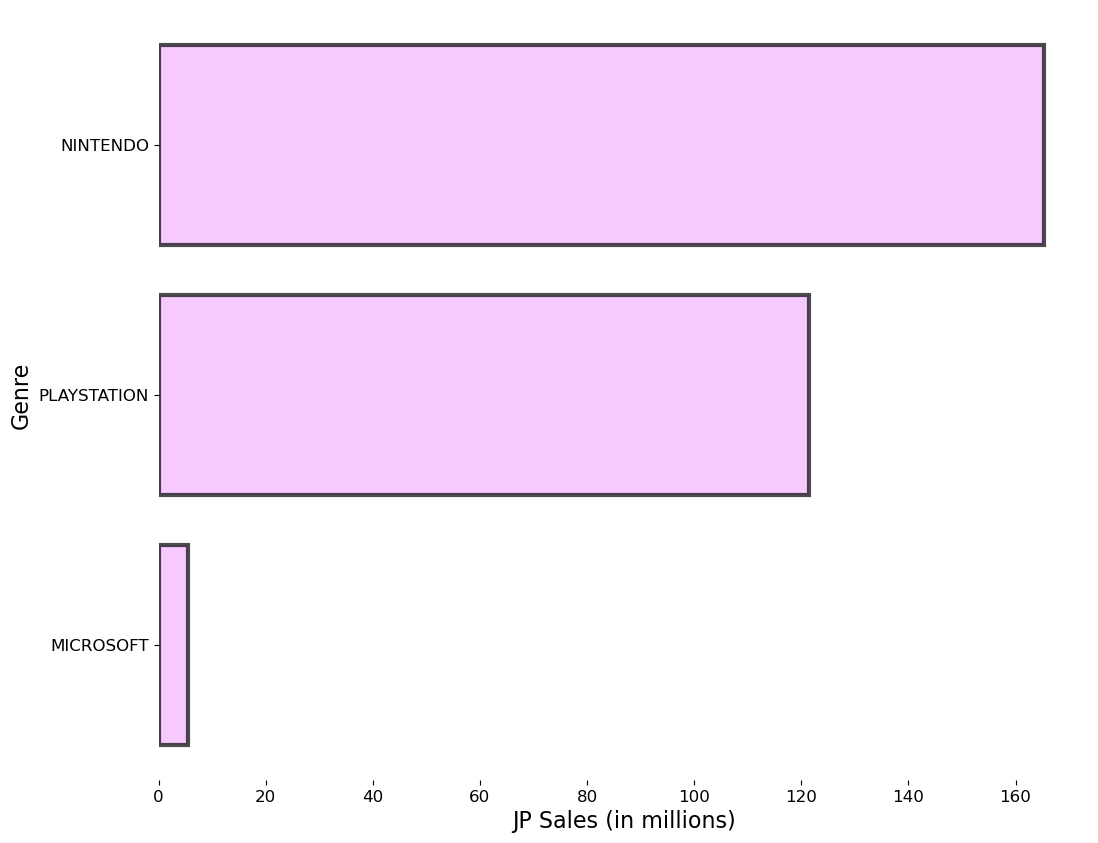

In [46]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['JP_Sales'], color='#f3b2ff', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('JP Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('JP_Sales.png', transparent=True)

# Show the plot
plt.show()

#### Insights:

### Other Sales by Platform

In [47]:
# Sort by 'JP_Sales' in descending order
aggregated_by_platform_data = aggregated_by_platform_data.sort_values(by='Other_Sales', ascending=False)
aggregated_by_platform_data

,Brand,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Publisher,Name,Platform
2,PLAYSTATION,359.78,374.35,121.48,143.78,999.31,70.739401,27278.0,6.703058,265414.0,"Rockstar North, Treyarch, Infinity Ward, Sledg...","M, E, T, E10+","Take-Two Interactive, Activision, Sony Compute...","Grand Theft Auto V, Call of Duty: Black Ops 3,...","PS3, PS4, PSP, PS2"
0,MICROSOFT,376.30,234.91,5.47,61.95,679.04,71.228535,27706.0,6.459886,422691.0,"Good Science Studio, Rockstar North, Infinity ...","E, M, E10+, T, EC, RP","Microsoft Game Studios, Take-Two Interactive, ...","Kinect Adventures!, Grand Theft Auto V, Call o...","X360, PC"
1,NINTENDO,317.35,187.63,165.38,47.56,718.33,67.713062,11973.0,6.905088,50796.0,"Retro Studios, Entertainment Analysis & Develo...","E, E10+, T, M, EC","Nintendo, Ubisoft, 505 Games, Sega, Capcom, Di...","Pokemon Black/Pokemon White, Pokemon X/Pokemon...","DS, 3DS, Wii, WiiU"


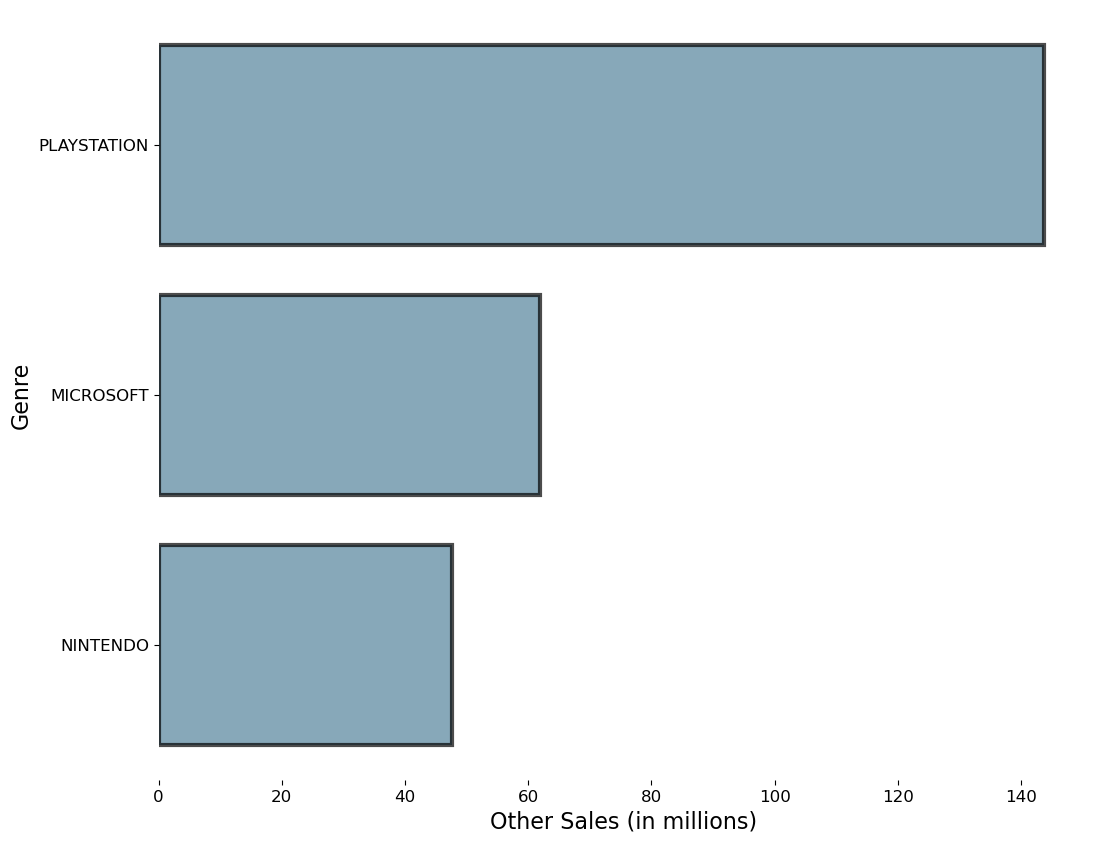

In [48]:
# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))


# Plotting horizontal bar graph
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['Other_Sales'], color='#54849c', alpha=0.7,edgecolor='black',linewidth=3)

# Set title and labels with adjusted font properties
#ax.set_title('Global Sales by Genre', fontsize=16, fontweight='bold')
ax.set_xlabel('Other Sales (in millions)', fontsize=16)
ax.set_ylabel('Genre', fontsize=16)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

#Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Other_Sales.png', transparent=True)

# Show the plot
plt.show()

#### Insights: Playstation is #1 followed by Nintendo and Microsoft

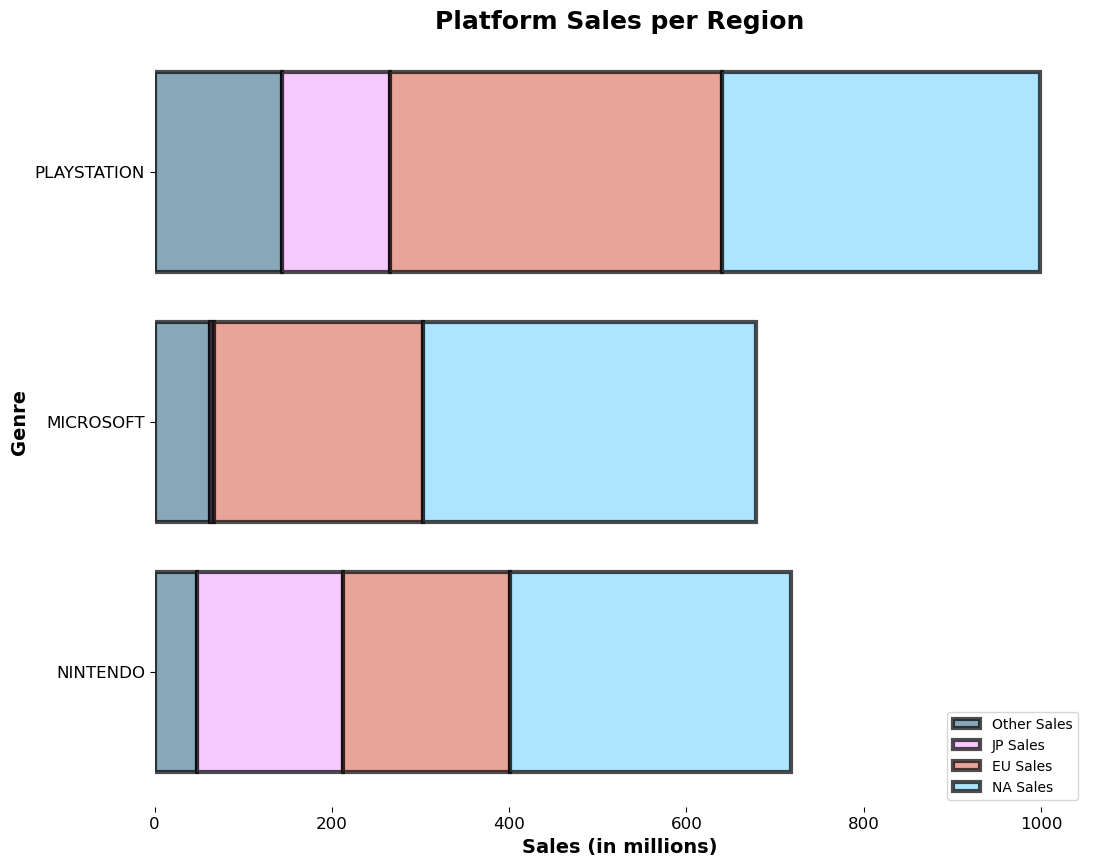

In [49]:
fig, ax = plt.subplots(figsize=(12, 10))

# Plotting stacked horizontal bar graph for Other Sales
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['Other_Sales'], color='#54849c', label='Other Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for JP Sales
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['JP_Sales'], left=aggregated_by_platform_data['Other_Sales'], color='#f3b2ff', label='JP Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for EU Sales
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['EU_Sales'], left=aggregated_by_platform_data['Other_Sales']+aggregated_by_platform_data['JP_Sales'], color='#dd7e6b', label='EU Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Plotting stacked horizontal bar graph for NA Sales
ax.barh(aggregated_by_platform_data['Brand'], aggregated_by_platform_data['NA_Sales'], left=aggregated_by_platform_data['Other_Sales']+aggregated_by_platform_data['JP_Sales']+aggregated_by_platform_data['EU_Sales'], color='#8ad9ff', label='NA Sales', alpha=0.7, edgecolor='black', linewidth=3)

# Set title and labels with adjusted font properties
ax.set_title('Platform Sales per Region', fontsize=18, fontweight='bold')
ax.set_xlabel('Sales (in millions)', fontsize=14,fontweight='bold')
ax.set_ylabel('Genre', fontsize=14,fontweight='bold')

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Add legend
ax.legend()

# Set background color to transparent
plt.gca().patch.set_facecolor('none')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Invert the y-axis to have the longest bar at the top and the lowest at the bottom
ax.invert_yaxis()

# Save plot with a transparent background
plt.savefig('Sales_by_Platform_and_Region.png', transparent=True)

# Show the plot
plt.show()


### How has the distribution of sales changed over the years across different gaming platforms?

In [50]:
#Compare this w/ current trends instead!

# Correlational Analysis

In [51]:
#Collate all numerical variables into one
numerical_data = main_data.select_dtypes(include = ['float64', 'int64'])
columns_to_remove = ["index","Year_of_Release"]
numerical_data = numerical_data.drop(columns=columns_to_remove)

numerical_data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN


In [52]:
#Remove rows where User_Count and Global_Sales are 0 or NaN/null
numerical_data = numerical_data[(numerical_data['Global_Sales'] != 0) & (numerical_data['User_Count'] != 0)] 
#Remove outlier for Global_Sales
#Dropping specific null columns
#numerical_data = numerical_data.dropna(subset=['User_Count', 'Global_Sales'], how='any')
numerical_data = numerical_data.sort_values(by='Global_Sales', ascending=False)
numerical_data.head(100)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,3.78,2.17,1.31,0.31,7.58,NaN,NaN,NaN,NaN
96,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN
97,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0
98,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN


In [53]:
#Correlation Matrix
# Drop rows where 'Global_Sales' column is equal to 80 in-place
numerical_data.drop(numerical_data[numerical_data['Global_Sales'] >= 25].index, inplace=True)
df_num_corr = numerical_data.corr()
df_num_corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
NA_Sales,1.000000,0.748044,0.368834,0.602838,0.926297,0.300492,0.344967,0.103664,0.314783
EU_Sales,0.748044,1.000000,0.366190,0.648754,0.890853,0.272220,0.321181,0.062690,0.360661
JP_Sales,0.368834,0.366190,1.000000,0.222545,0.572029,0.161625,0.174787,0.134473,0.081086
Other_Sales,0.602838,0.648754,0.222545,1.000000,0.713537,0.217314,0.263030,0.058908,0.269195
Global_Sales,0.926297,0.890853,0.572029,0.713537,1.000000,0.309835,0.359050,0.106906,0.344078
Critic_Score,0.300492,0.272220,0.161625,0.217314,0.309835,1.000000,0.423585,0.580423,0.264149
Critic_Count,0.344967,0.321181,0.174787,0.263030,0.359050,0.423585,1.000000,0.194315,0.362496
User_Score,0.103664,0.062690,0.134473,0.058908,0.106906,0.580423,0.194315,1.000000,0.025481
User_Count,0.314783,0.360661,0.081086,0.269195,0.344078,0.264149,0.362496,0.025481,1.000000


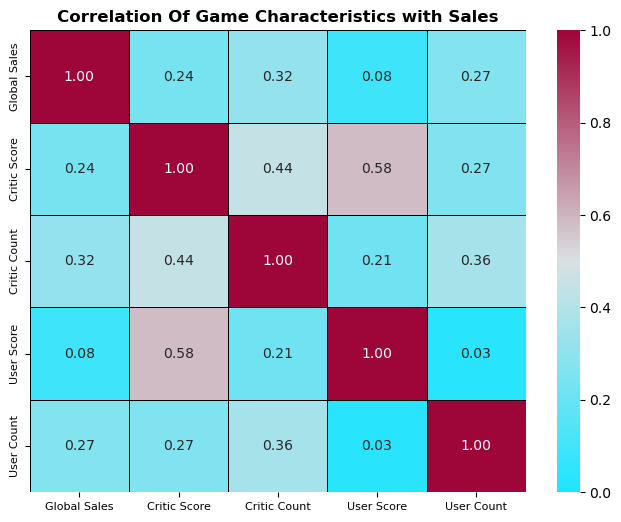

In [54]:
from matplotlib.colors import LinearSegmentedColormap
# Assign values to a new dataframe
correlationDataFrame = pd.DataFrame({
    'Global Sales': filtered_data['Global_Sales'],
    'Critic Score': filtered_data['Critic_Score'],
    'Critic Count': filtered_data['Critic_Count'],
    'User Score': filtered_data['User_Score'],
    'User Count': filtered_data['User_Count']
})

scoresDataFrameCorr = correlationDataFrame.corr()

# Create the heatmap with the specified color range
fig, ax = plt.subplots(figsize=(8, 6))
# Make custom colors
colors = [(0, '#1EE5FF'), (0.5, '#D9E1E2'), (1, '#9E0538')]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)
sns.heatmap(scoresDataFrameCorr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=0, vmax=1, ax=ax, linecolor='black') 
ax.set_title('Correlation Of Game Characteristics with Sales', fontweight='bold')  # Set title with bold font

# Adjust x and y tick label font sizes
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Save plot with a transparent background
plt.savefig('Correlation_scores_sales.png', transparent=True)

# Show the plot
plt.show()

#### Insights: Critic Score,Critic Count and User Count has a positive moderate correlation and User Score has a weak correlation

b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
b:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout ha

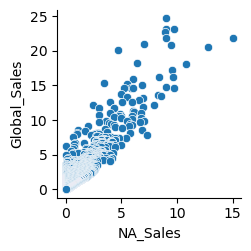

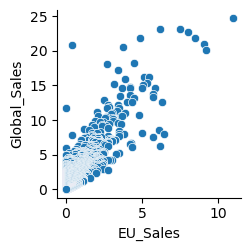

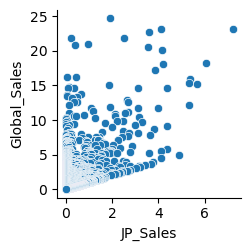

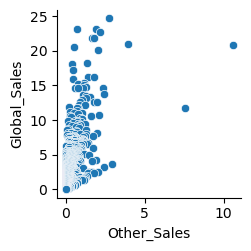

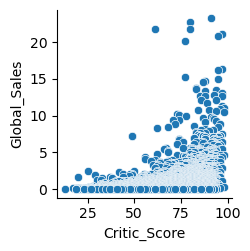

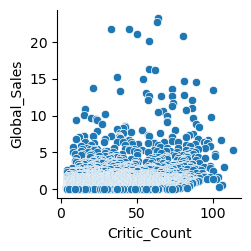

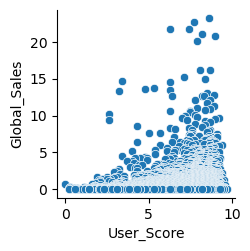

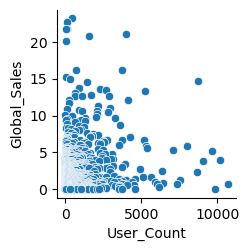

In [55]:
#Make a pairplot
columns = numerical_data.columns[0]
for col in numerical_data:
    if col != 'Global_Sales':
        sns.pairplot(data=numerical_data,
                    x_vars=col,
                    y_vars=['Global_Sales'])

### Relation between Scores and Sales

##### Global Sales & Critic_Score

In [56]:
filtered_data['Global_Sales'].describe()

count    14140.000000
mean         0.509107
std          1.485129
min          0.010000
25%          0.060000
50%          0.160000
75%          0.460000
max         82.530000
Name: Global_Sales, dtype: float64

In [57]:
filtered_data['Critic_Score'].describe()

count    7771.000000
mean       68.795522
std        13.913375
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

C:\Users\ignis\AppData\Local\Temp\ipykernel_21832\3727733590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Critic_Score_Group'] = pd.cut(filtered_data['Critic_Score'], bins, right=False)


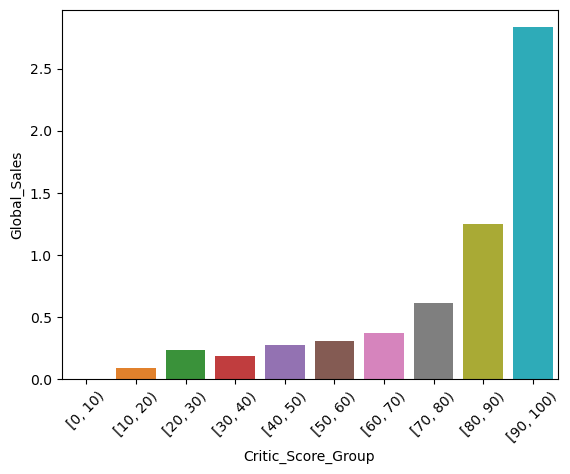

In [58]:
# Create bins for Critic_Score with steps of 10
bins = [i for i in range(0, 101, 10)]

# Create a new categorical variable based on the bins
filtered_data['Critic_Score_Group'] = pd.cut(filtered_data['Critic_Score'], bins, right=False)

# Create a grouped bar plot with adjusted y-axis limits
sns.barplot(x='Critic_Score_Group', y='Global_Sales', data=filtered_data, errorbar=None)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


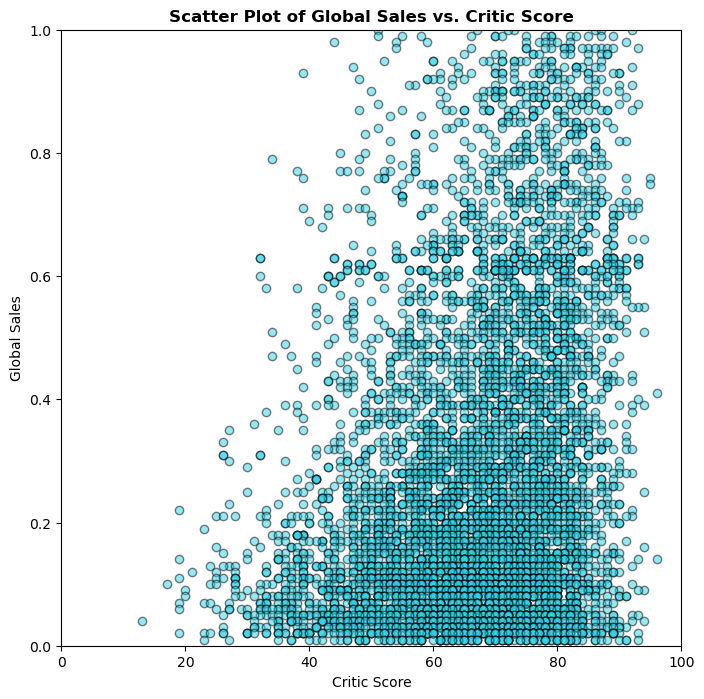

In [59]:
# Scatter plot with adjusted y-axis limits
plt.figure(figsize=(8, 8))
plt.scatter(filtered_data['Critic_Score'], filtered_data['Global_Sales'], alpha=0.5, color='#2FD3E8', edgecolors='black')

# Set y-axis limits
plt.ylim(0, 1)
plt.xlim(0, 100)
# Title and labels
plt.title('Scatter Plot of Global Sales vs. Critic Score', fontweight='bold')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')

# Save plot with a transparent background
plt.savefig('Critic_Score_scatter.png', transparent=True)

# Show the plot
plt.show()

#### Insights: Based from this scatterplot, we can see that there's a mixed concentration of sales above 40 Critic_Score and there's no strong indicator of correlation with sales

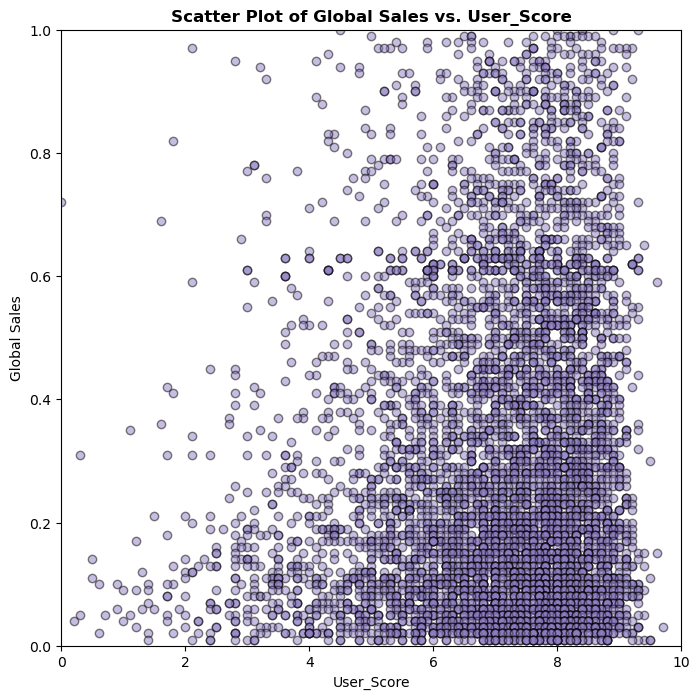

In [60]:
# Scatter plot with adjusted y-axis limits
plt.figure(figsize=(8, 8))
plt.scatter(filtered_data['User_Score'], filtered_data['Global_Sales'], alpha=0.5, color='#8e7cc3', edgecolors='black')

# Set y-axis limits
plt.ylim(0, 1)
plt.xlim(0, 10)
# Title and labels
plt.title('Scatter Plot of Global Sales vs. User_Score', fontweight='bold')
plt.xlabel('User_Score')
plt.ylabel('Global Sales')

# Save plot with a transparent background
plt.savefig('User_score_scatter.png', transparent=True)

# Show the plot
plt.show()

#### Insights: Based from this scatterplot, we can see that there's a mixed concentration of sales above 5 Critic_Score and there's no strong indicator of correlation with sales

# External Source: Video Game Market Chart Recreation

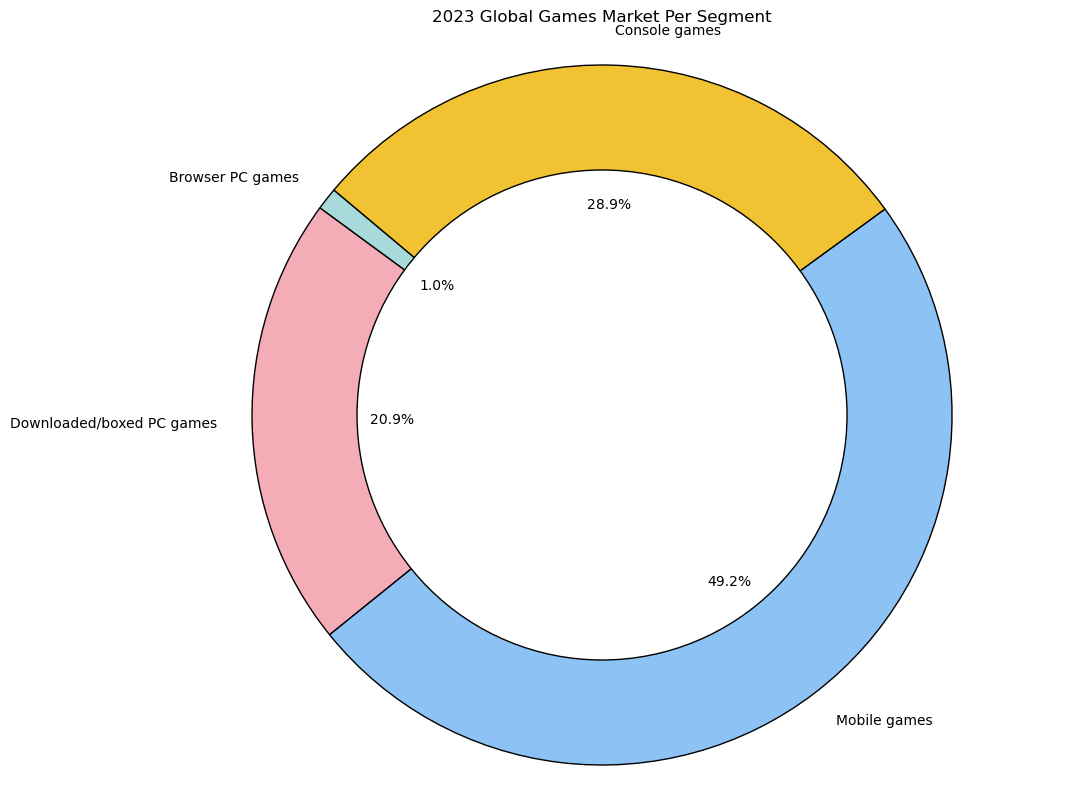

In [61]:
# Data
labels = ['Browser PC games', 'Downloaded/boxed PC games', 'Mobile games', 'Console games']
sizes = [1.9, 38.4, 90.5, 53.1]
pastel_colors = ['#a8dadc', '#f4acb7', '#8cc3f4', '#f1c232']

# Increase resolution and plot the pie chart
fig1, ax1 = plt.subplots(figsize=(12, 10))  # Adjust the figsize here
patches, texts, autotexts = ax1.pie(sizes, labels=labels, colors=pastel_colors,
                                    autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='black'))

# Draw center circle for 'donut' style
centre_circle = plt.Circle((0,0),0.70,color='black', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('2023 Global Games Market Per Segment')
plt.show()


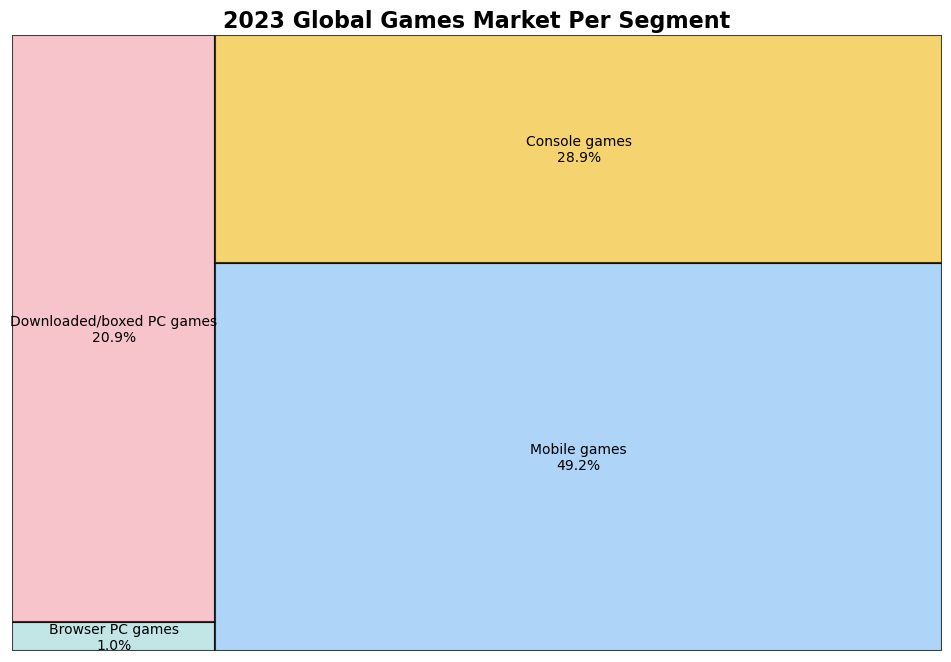

In [62]:
# Data
labels = ['Browser PC games', 'Downloaded/boxed PC games', 'Mobile games', 'Console games']
sizes = [1.9, 38.4, 90.5, 53.1]
pastel_colors = ['#a8dadc', '#f4acb7', '#8cc3f4', '#f1c232']

# Calculate total sales
total_sales = sum(sizes)

# Calculate percentage contribution
percentages = [(size / total_sales) * 100 for size in sizes]

# Set figure size
plt.figure(figsize=(12, 8))

# Plotting treemap chart
squarify.plot(sizes=sizes,
              label=[f"{label}\n{percentage:.1f}%" for label, percentage in zip(labels, percentages)],
              color=pastel_colors,
              alpha=0.7,
              edgecolor='black', linewidth=1.5)

# Add title
plt.title('2023 Global Games Market Per Segment', fontsize=16, fontweight='bold')

# Remove axis
plt.axis('off')

# Show plot
plt.show()

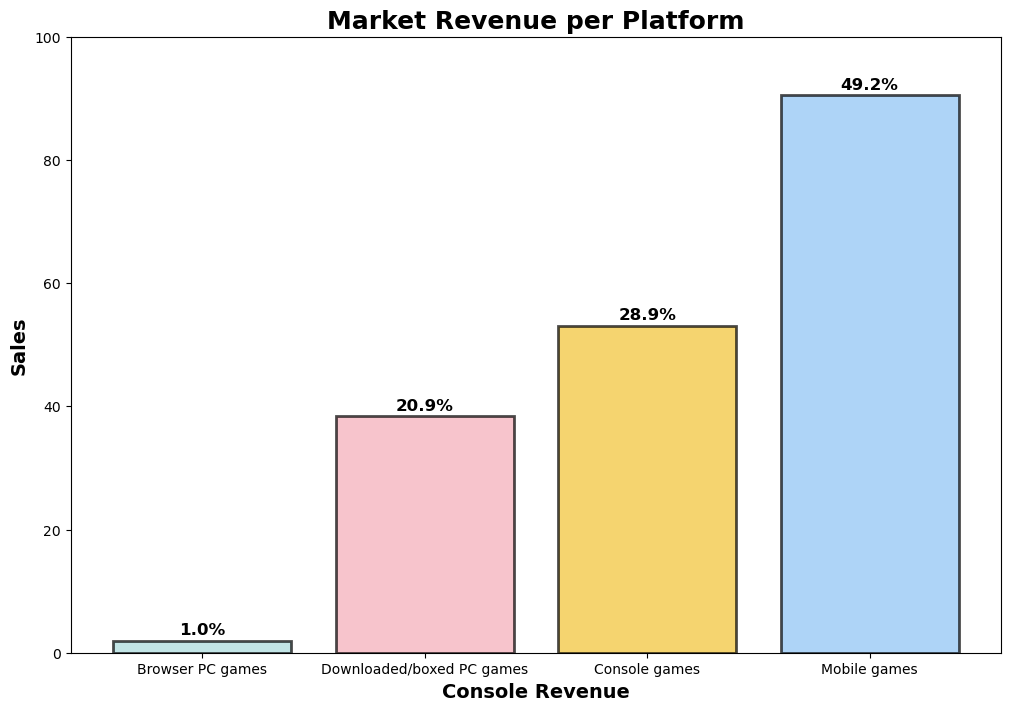

In [65]:
# Data
labels = ['Browser PC games', 'Downloaded/boxed PC games', 'Console games', 'Mobile games']
sizes = [1.9, 38.4, 53.1, 90.5]
pastel_colors = ['#a8dadc', '#f4acb7', '#f1c232', '#8cc3f4']

# Calculate total sales
total_sales = sum(sizes)

# Calculate percentage contribution
percentages = [(size / total_sales) * 100 for size in sizes]

# Set figure size
plt.figure(figsize=(12, 8))

# Plotting vertical bar chart with alpha set to 90%
plt.bar(labels, sizes, color=pastel_colors, edgecolor='black', linewidth=2, alpha=0.70)

# Add percentages as text above each bar
for i, size in enumerate(sizes):
    plt.text(i, size + 1, f'{percentages[i]:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Add title
plt.title("Market Revenue per Platform",fontsize=18,fontweight='bold')

# Remove x-axis label
plt.xlabel('Console Revenue',fontsize=14,fontweight='bold')

# Set y-axis label
plt.ylabel('Sales', fontsize=14,fontweight='bold')

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Save plot with a transparent background
plt.savefig('Global Games Market.png', transparent=True)

# Show plot
plt.show()
